## Steps

- Import Labararies
- Load Data
- Data Preprocessing
- Model Building
- Diagnostics
- Forcasting
- Model Building - Exponential Smoothing
- Evalution & Comparision
- Conclusion


## Import Labararies

In [1]:
%pip install pmdarima

In [2]:

%pip install numpy==1.26.4

In [3]:

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=300
import seaborn as sns
sns.set_theme(style='darkgrid',palette='rainbow')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## load Data

In [5]:
# Load The Dataset and Parse the Date
df=pd.read_csv('exchange_rate.csv',
               parse_dates=True)
df.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [6]:
print(df.columns)

Index(['date', 'Ex_rate'], dtype='object')


In [8]:
# Convert date column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y %H:%M')


# Check the result
df.head()

,date,Ex_rate
0,1990-01-01,0.7855
1,1990-01-02,0.7818
2,1990-01-03,0.7867
3,1990-01-04,0.7860
4,1990-01-05,0.7849


In [9]:
# Set date as index (optional but useful)
df.set_index('date', inplace=True)

In [10]:
df

,Ex_rate
date,
1990-01-01,0.785500
1990-01-02,0.781800
1990-01-03,0.786700
1990-01-04,0.786000
1990-01-05,0.784900
...,...
2010-10-06,0.718494
2010-10-07,0.721839
2010-10-08,0.723197


In [11]:
df.dtypes

,0
Ex_rate,float64


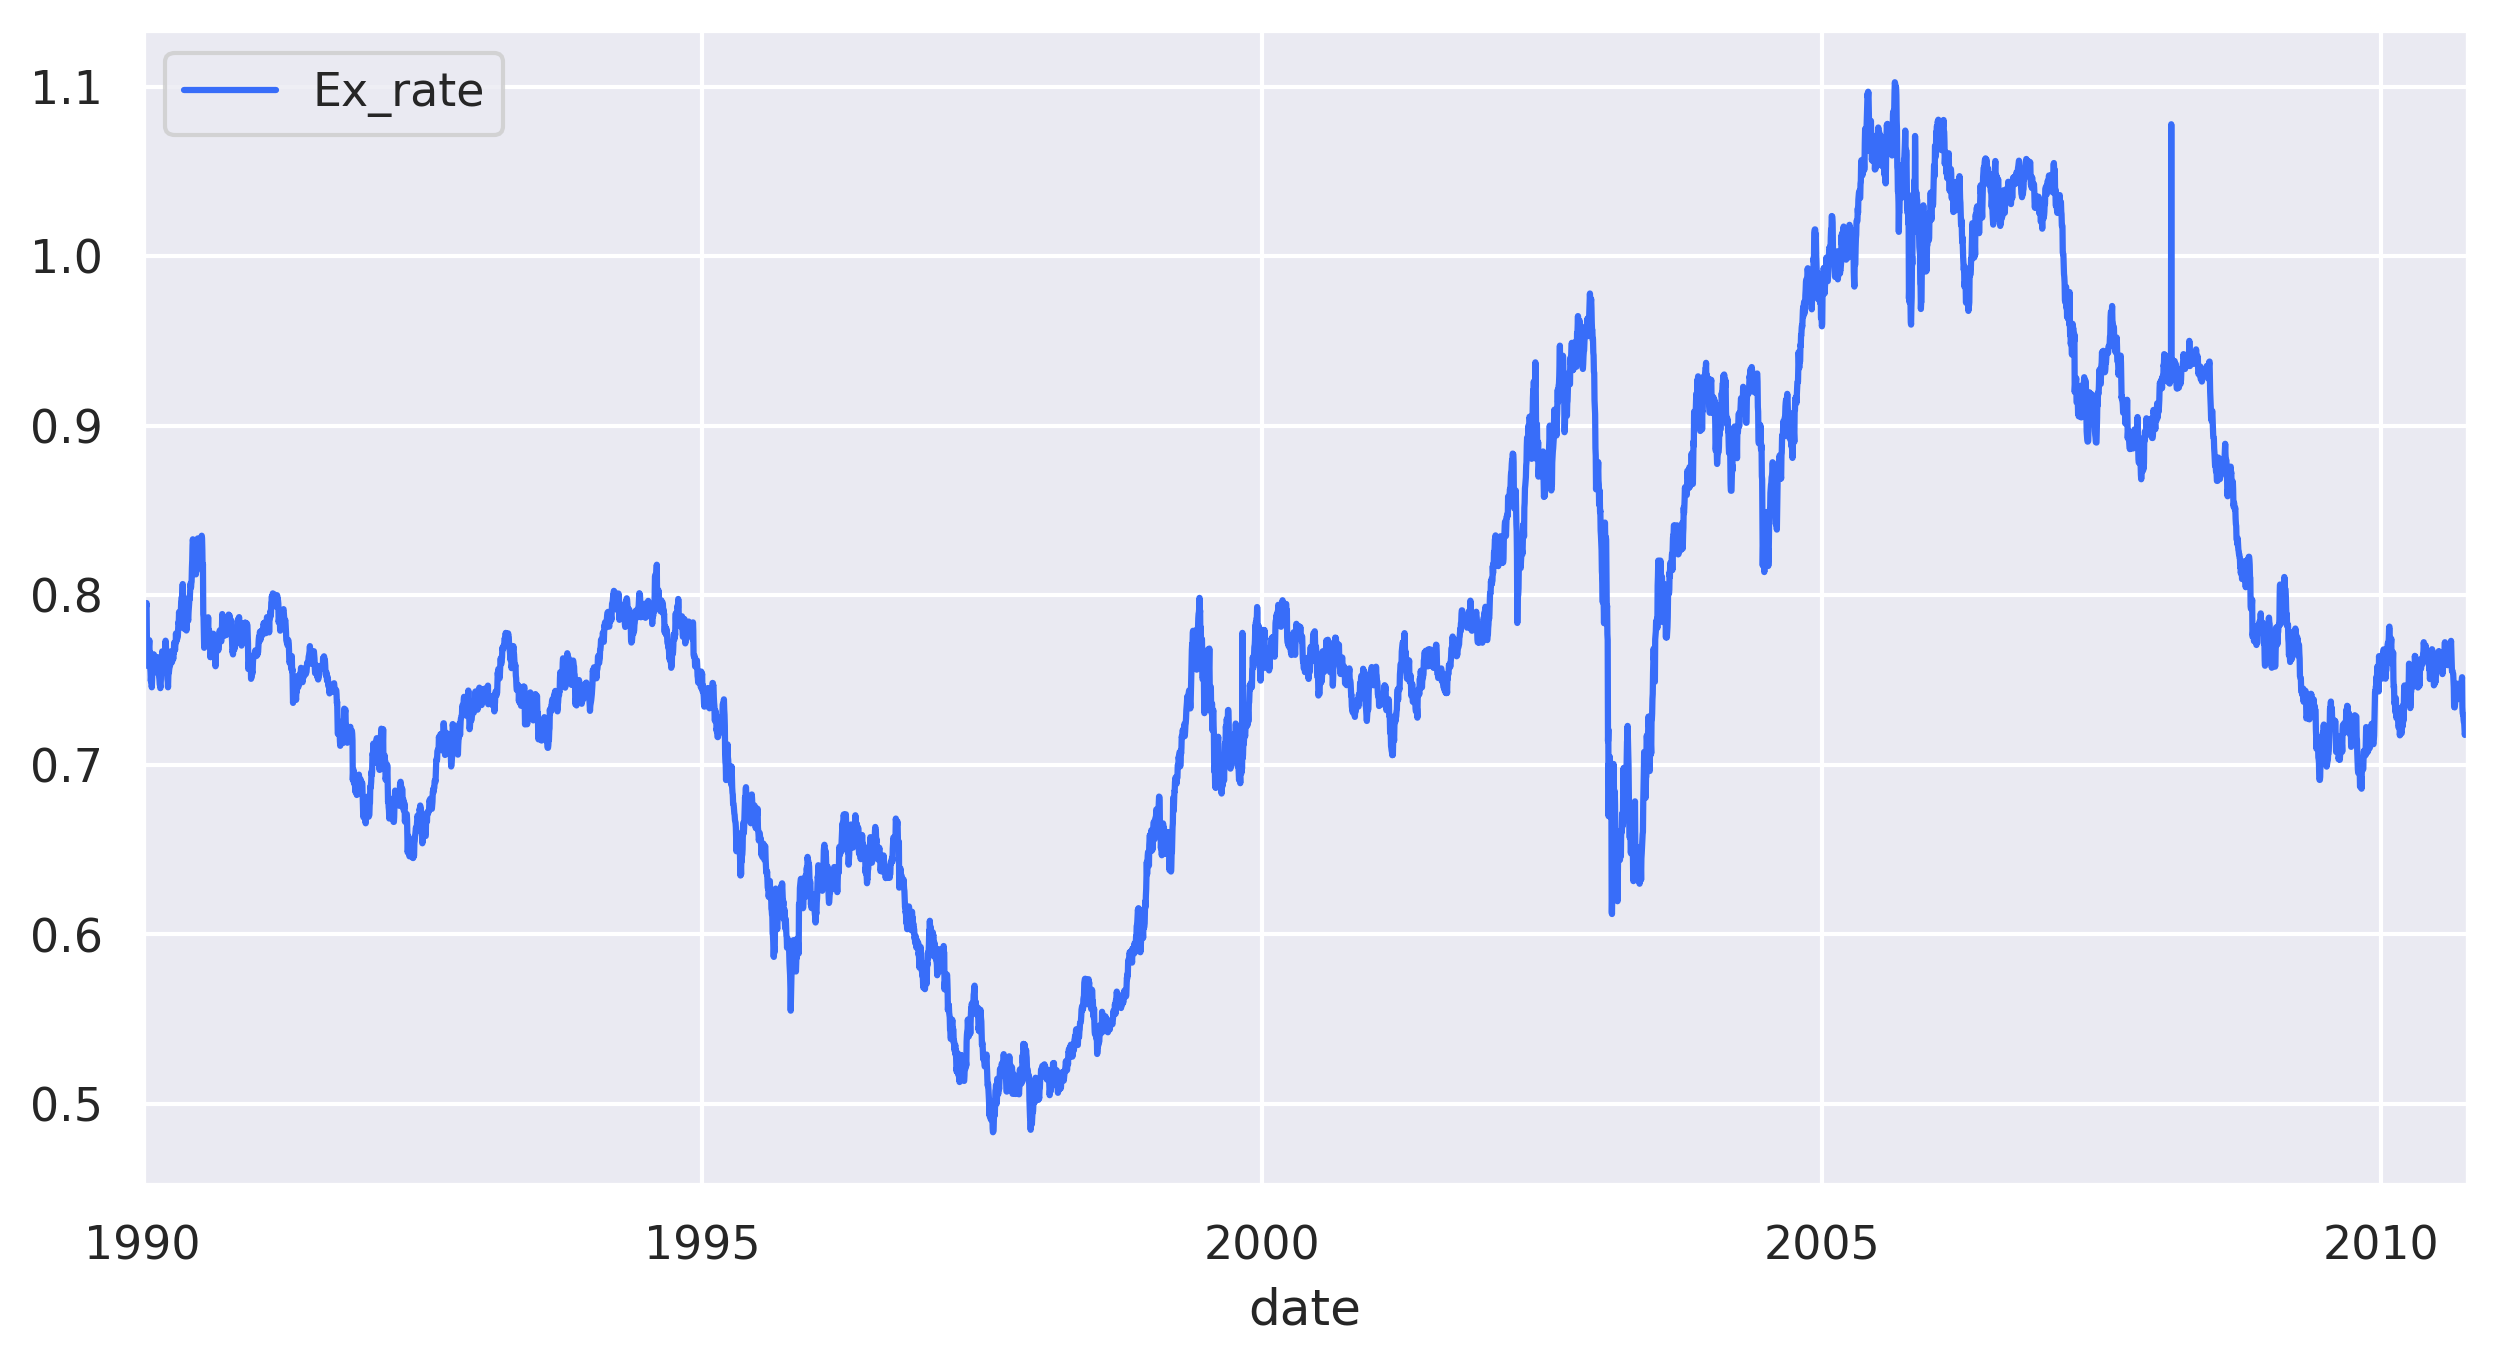

In [12]:
df.plot()
plt.show()

# Data Preprocessing

In [13]:
df.isna().sum()

,0
Ex_rate,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7588 entries, 1990-01-01 to 2010-10-10
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ex_rate  7588 non-null   float64
dtypes: float64(1)
memory usage: 118.6 KB


In [15]:
df.describe()

,Ex_rate
count,7588.000000
mean,0.776974
std,0.136620
min,0.483297
25%,0.701422
50%,0.761377
75%,0.873477
max,1.102536


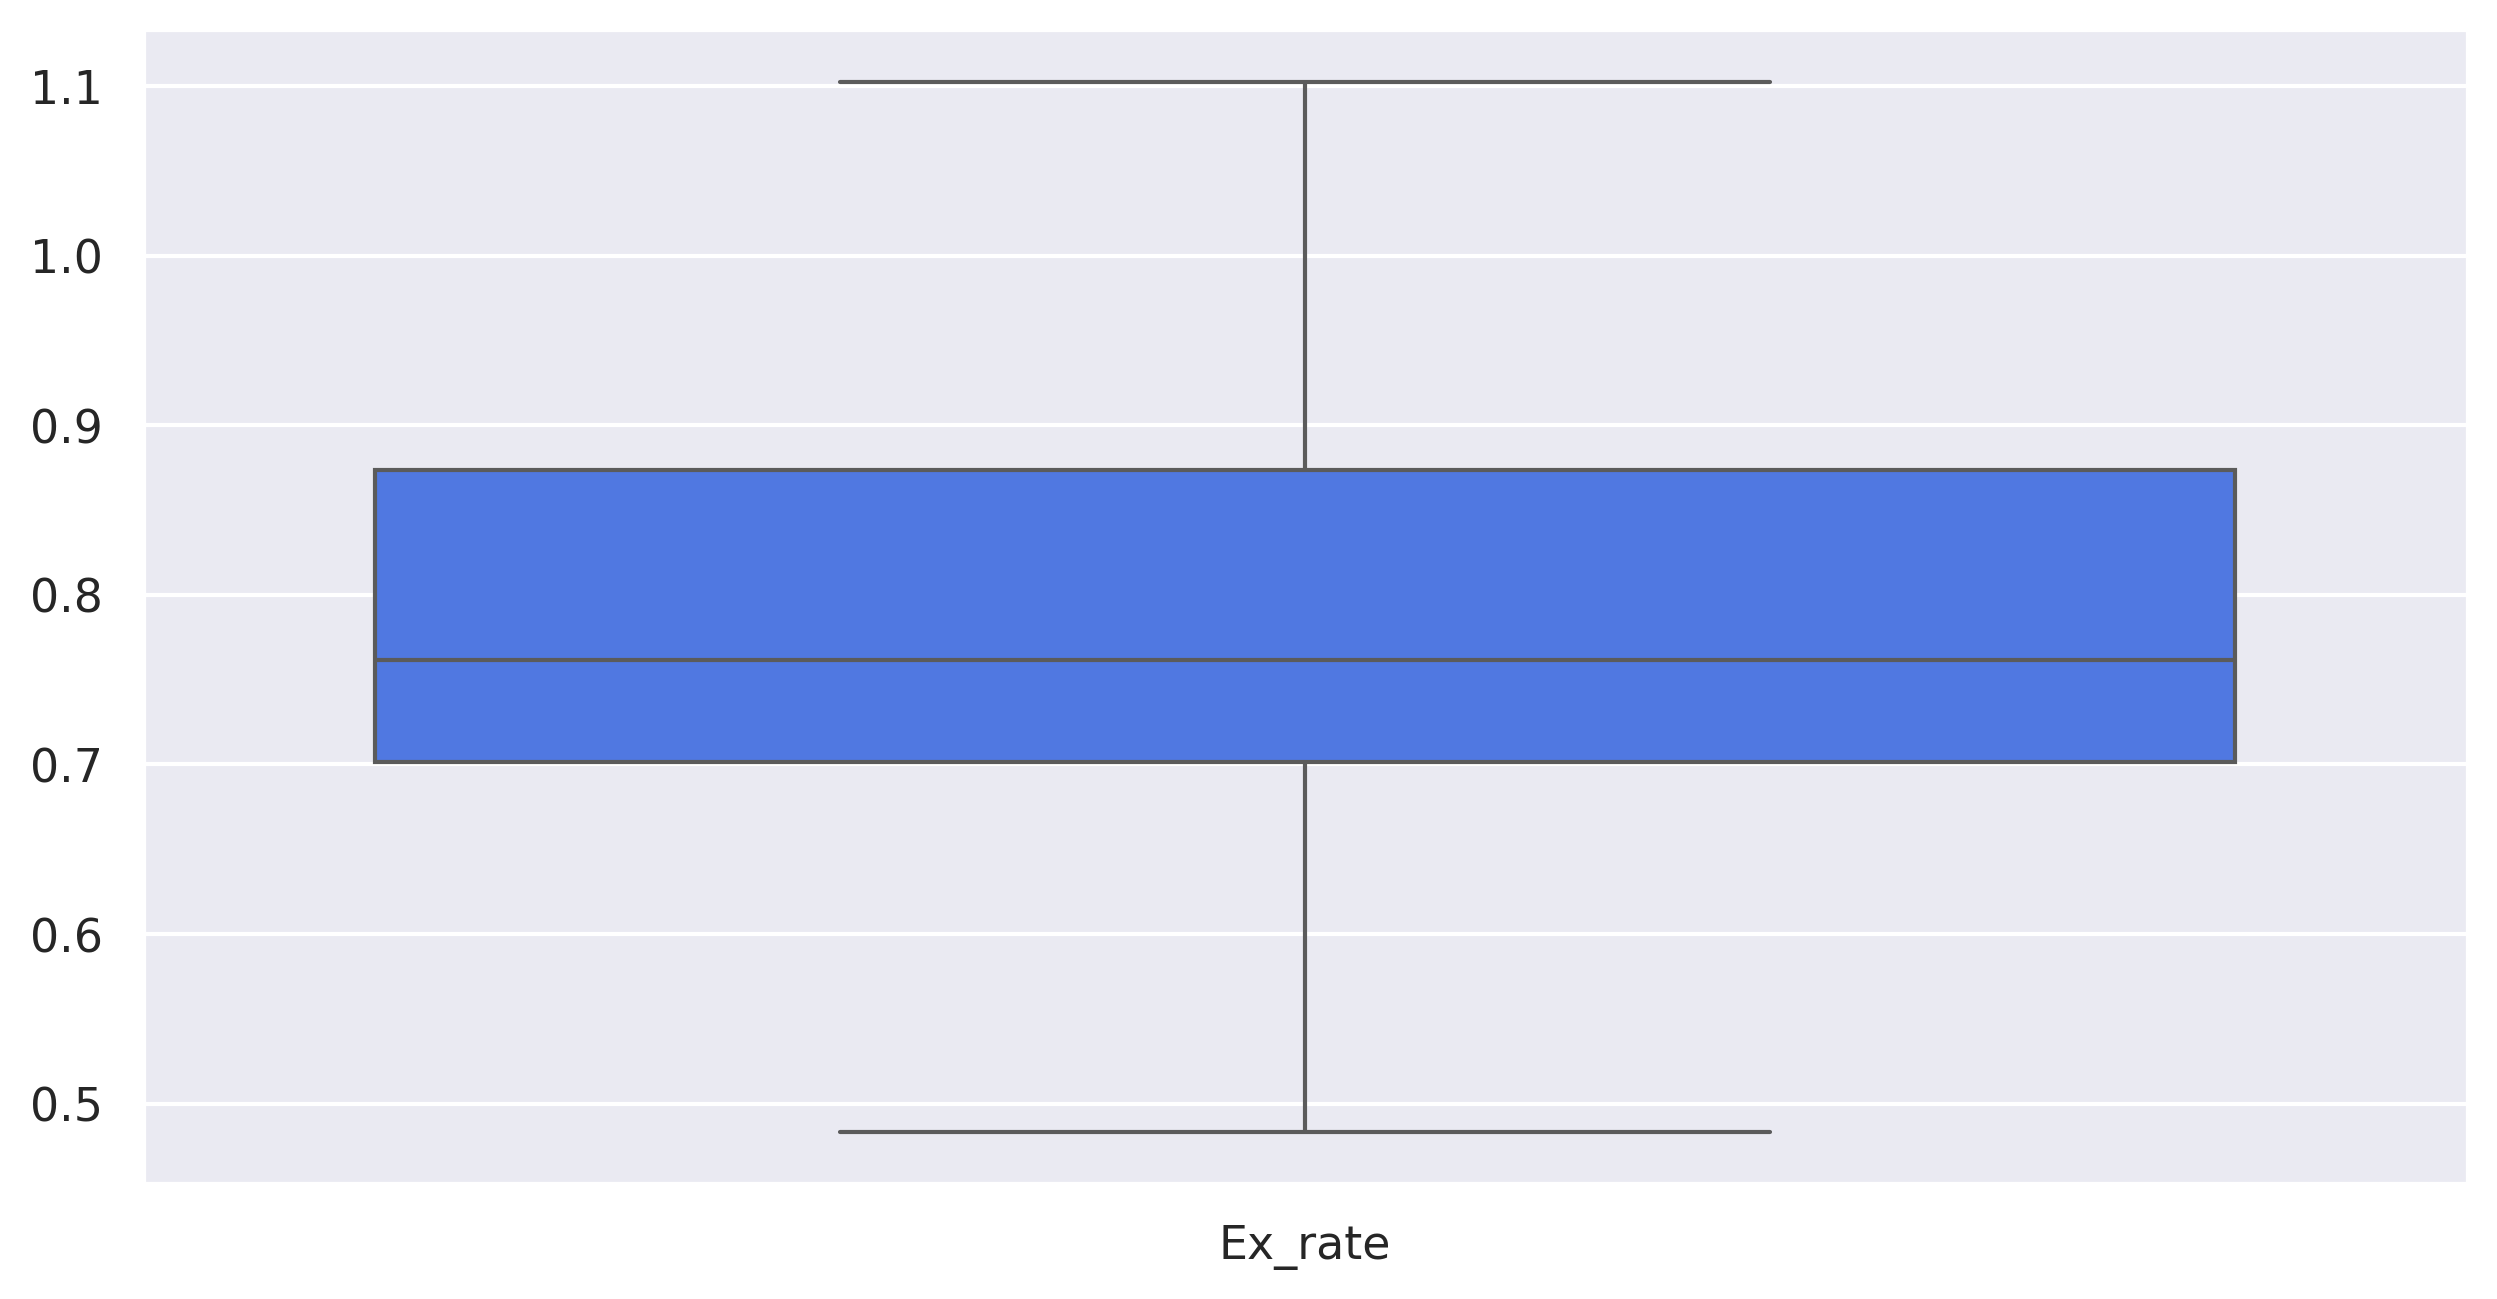

In [16]:
#Boxplot for a specific column to detect outliers
sns.boxplot(df)
plt.show()

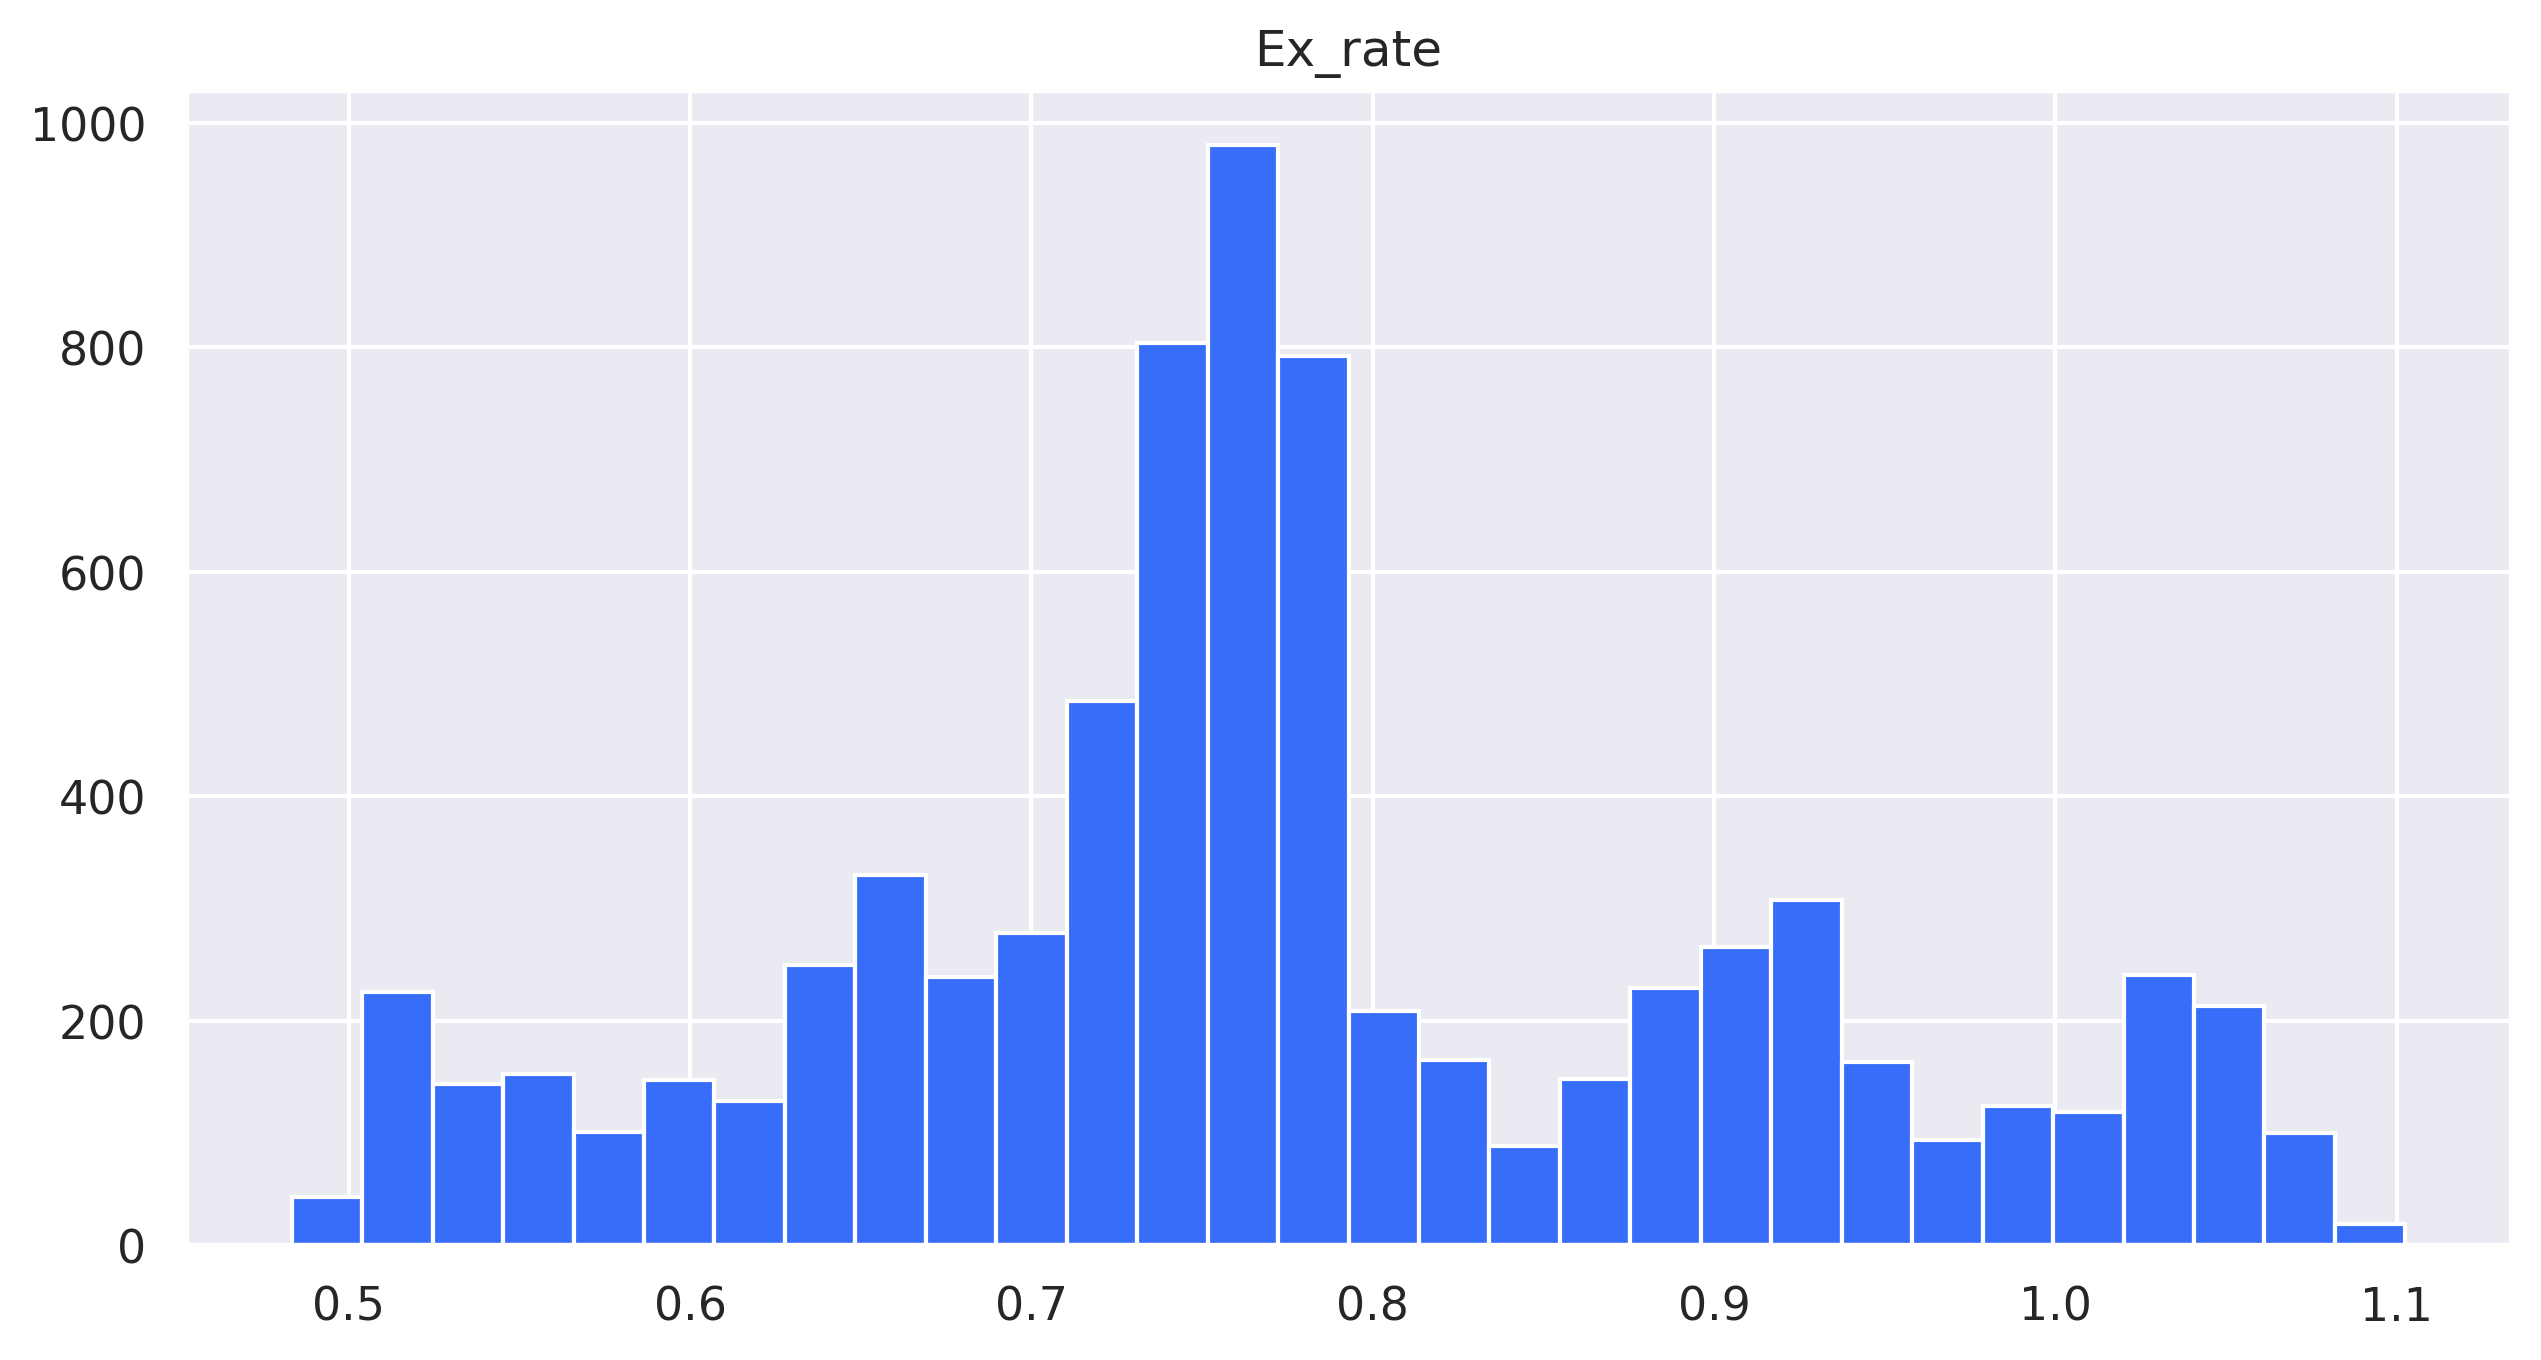

In [23]:
df.hist(bins=30)
plt.show()

In [24]:
# To make data stationary

In [25]:
from statsmodels.tsa.stattools import adfuller
adfuller(df['Ex_rate'])[1]

0.4492327353597477

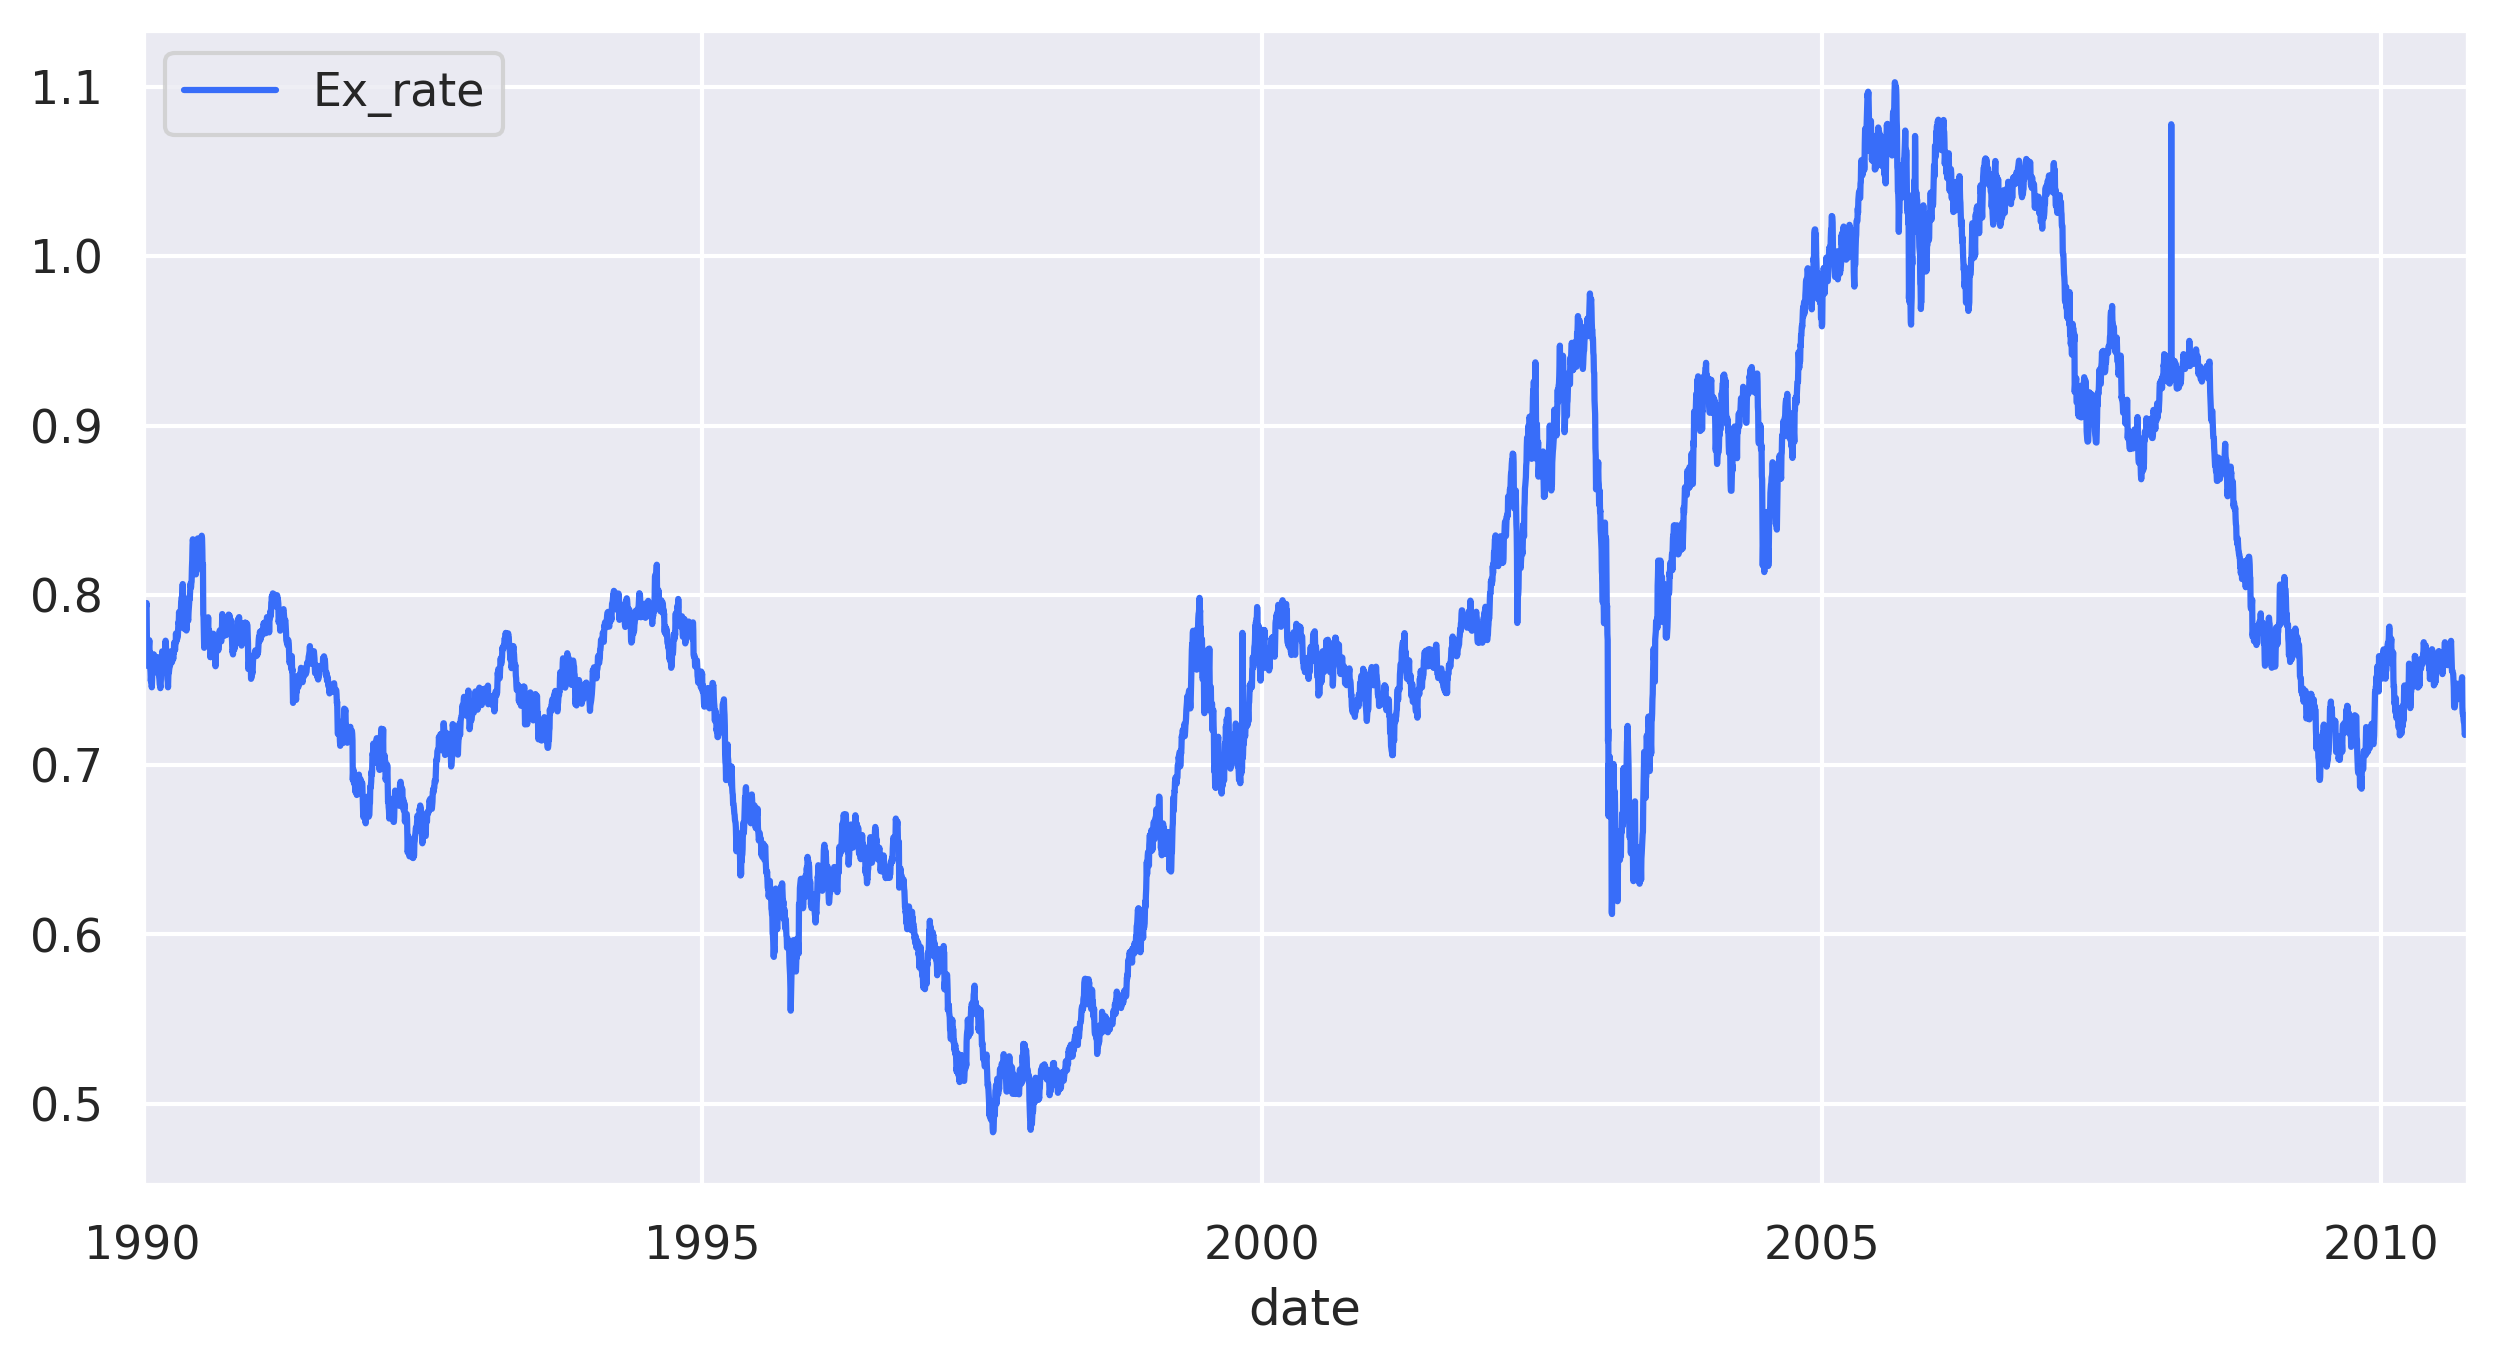

In [26]:
df.plot()
plt.show()

# Model Building

In [27]:
import numpy as np
# First, make sure it's numeric and then apply the log transformation
ts_log = np.log(df['Ex_rate'])

# Apply differencing to remove trend
ts_log_diff = ts_log.diff().dropna()

# Now, apply ACF and PACF on the differenced data
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20)

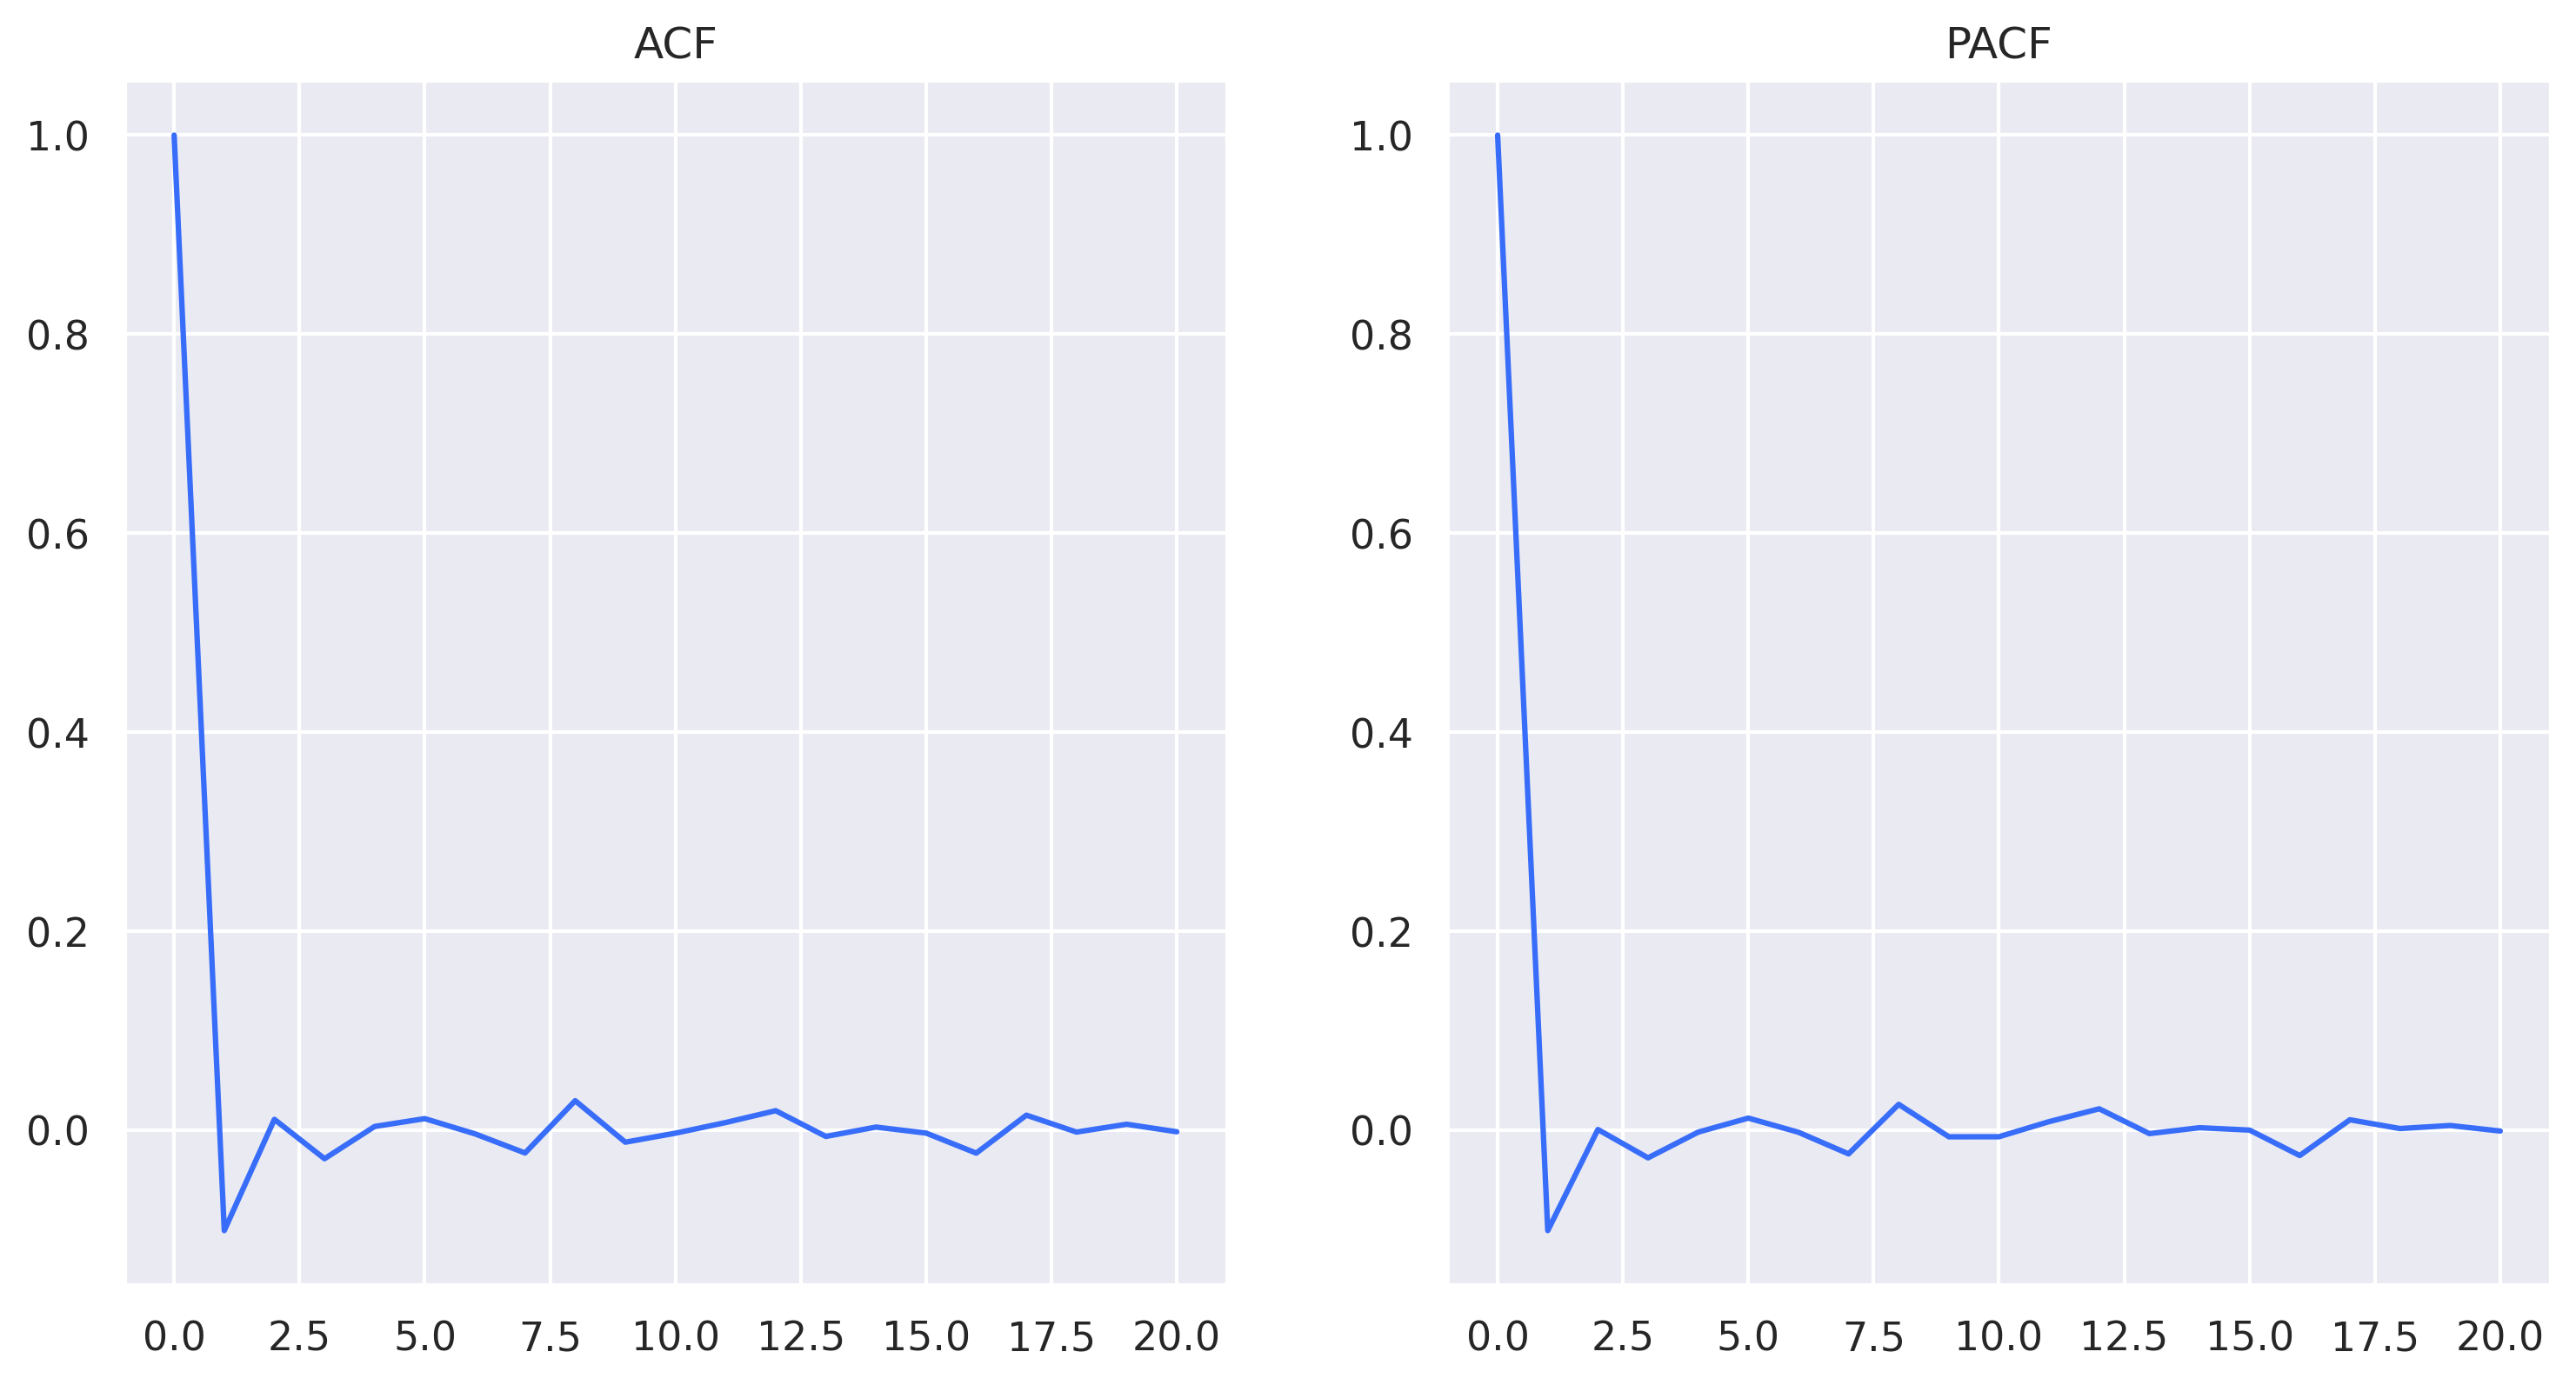

In [28]:
# Plot ACF
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(lag_acf)
plt.title('ACF')

# Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.title('PACF')
plt.show()

In [29]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from statsmodels.tsa.stattools import adfuller

In [30]:
order=auto_arima(df['Ex_rate'])
order

ARIMA(order=(1, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [31]:
df.shape

(7588, 1)

In [32]:
# split the data

In [33]:
train = df.iloc[:-20]
test  = df.iloc[-20:]

In [34]:
train.shape

(7568, 1)

In [35]:
train

,Ex_rate
date,
1990-01-01,0.785500
1990-01-02,0.781800
1990-01-03,0.786700
1990-01-04,0.786000
1990-01-05,0.784900
...,...
2010-09-16,0.744602
2010-09-17,0.744158
2010-09-18,0.745184


In [36]:
test.shape

(20, 1)

In [37]:
# Arima model

In [38]:
model = ARIMA(train['Ex_rate'], order=(0,0,1)).fit()

In [39]:
#Evoluating the model

In [40]:
test

,Ex_rate
date,
2010-09-21,0.749681
2010-09-22,0.751654
2010-09-23,0.733999
2010-09-24,0.730567
2010-09-25,0.729714
2010-09-26,0.729714
2010-09-27,0.726533
2010-09-28,0.725058
2010-09-29,0.724506


In [41]:
train

,Ex_rate
date,
1990-01-01,0.785500
1990-01-02,0.781800
1990-01-03,0.786700
1990-01-04,0.786000
1990-01-05,0.784900
...,...
2010-09-16,0.744602
2010-09-17,0.744158
2010-09-18,0.745184


In [42]:
ypred = model.predict(start =1990, end =2009)
ypred

,predicted_mean
1995-06-14,0.723944
1995-06-15,0.729355
1995-06-16,0.717853
1995-06-17,0.728477
1995-06-18,0.717928
1995-06-19,0.728887
1995-06-20,0.717339
1995-06-21,0.730905
1995-06-22,0.724081
1995-06-23,0.724877


In [43]:
import numpy as np

In [44]:
test_ex_rate_aligned = test['Ex_rate'][:len(ypred)]
print(np.sqrt(mean_squared_error(test_ex_rate_aligned, ypred)))

0.009822275266197727


# 	Diagnostics

In [45]:
# Resdiual
from statsmodels.tsa.arima.model import ARIMA

# Define parameters (replace p, d, q with your selected values)
p, d, q = 1, 1, 0  # Example values

# Fit the ARIMA model
model = ARIMA(df['Ex_rate'], order=(p, d, q))
results = model.fit()

# Print model summary
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 0)   Log Likelihood               28054.159
Date:                Wed, 13 Aug 2025   AIC                         -56104.319
Time:                        16:33:17   BIC                         -56090.450
Sample:                    01-01-1990   HQIC                        -56099.559
                         - 10-10-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1314      0.002    -64.439      0.000      -0.135      -0.127
sigma2      3.595e-05   9.94e-08    361.720      0.000    3.58e-05    3.61e-05
Ljung-Box (L1) (Q):                   0.00   Jarque-

In [46]:
# Extract residuals from the fitted model
residuals = results.resid

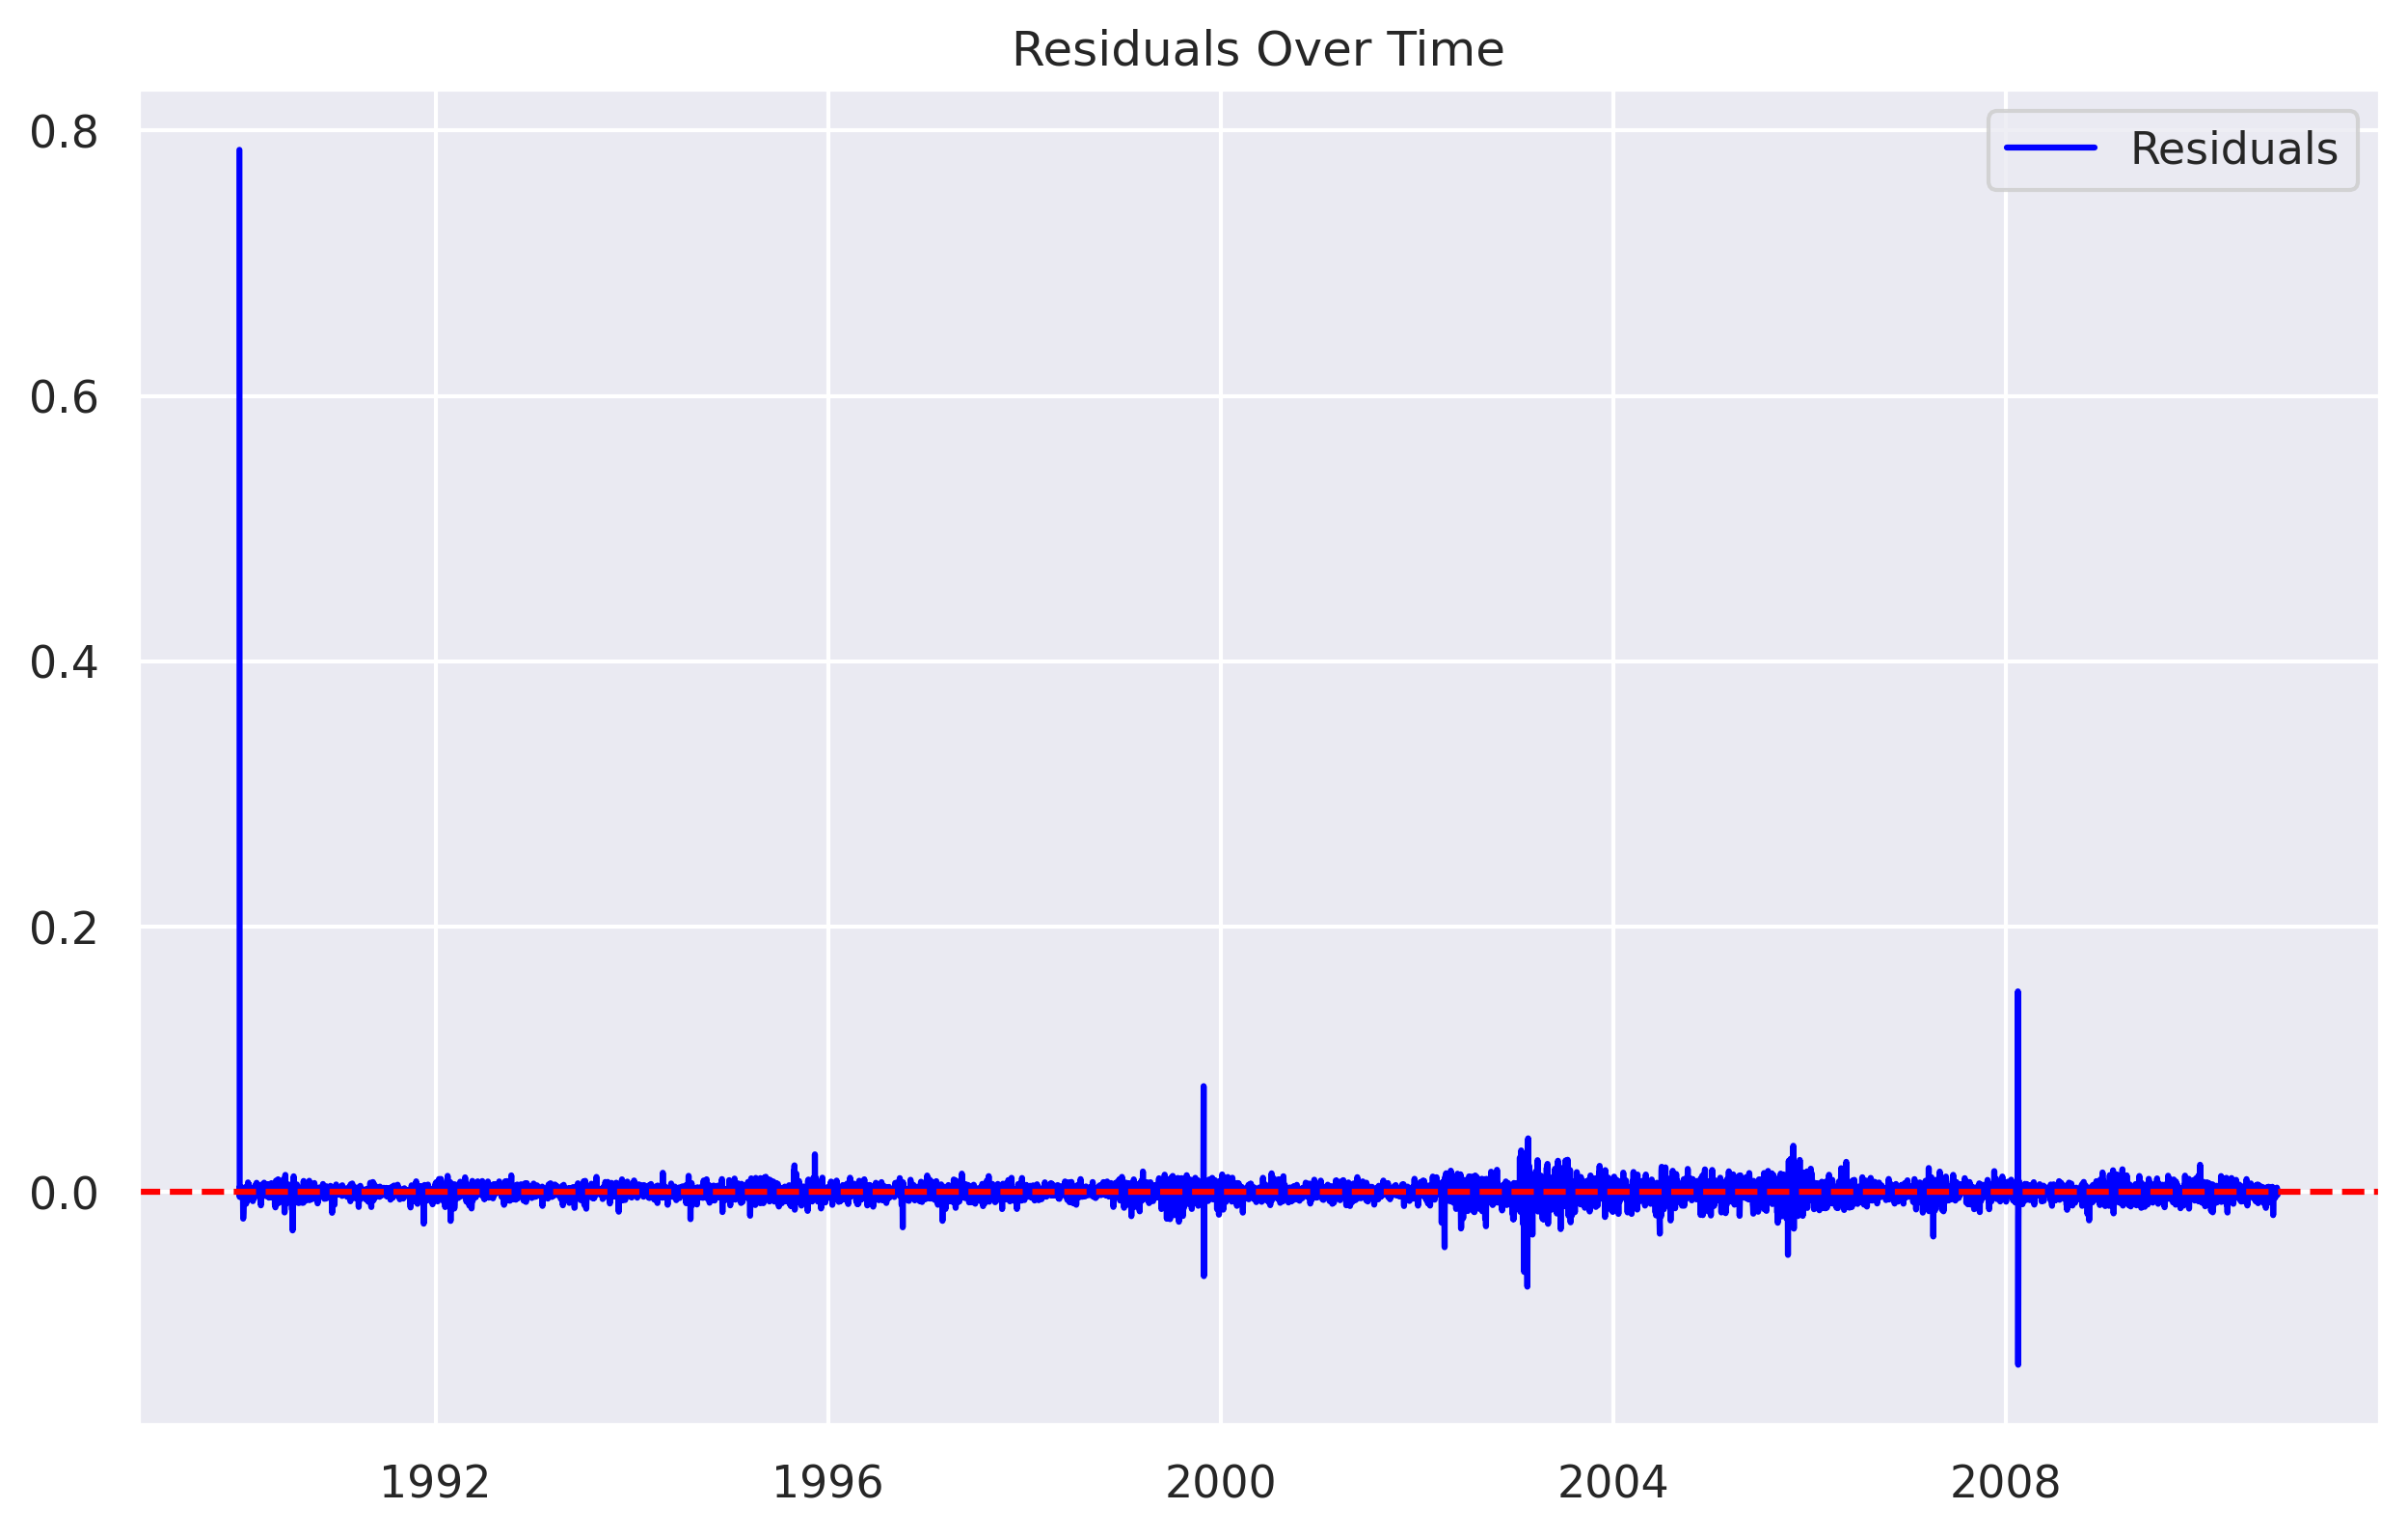

In [47]:

plt.figure(figsize=(10, 6))
plt.plot(residuals, label='Residuals', color='blue')
plt.axhline(0, linestyle='--', color='red')
plt.title('Residuals Over Time')
plt.legend()
plt.show()

# Forcasting

In [48]:
ARIMA_prediction = pd.Series( results.fittedvalues,copy = True)
print(ARIMA_prediction.head())

date
1990-01-01    0.000000
1990-01-02    0.785500
1990-01-03    0.782286
1990-01-04    0.786056
1990-01-05    0.786092
dtype: float64


In [49]:
ARIMA_prediction_cumsum = ARIMA_prediction.cumsum()
print(ARIMA_prediction.head()) # why cumsum -because have taken the difference of our time series

date
1990-01-01    0.000000
1990-01-02    0.785500
1990-01-03    0.782286
1990-01-04    0.786056
1990-01-05    0.786092
dtype: float64


In [50]:
ARIMA_log_prediction = pd.Series(ts_log.iloc[0],index=ts_log.index)
ARIMA_log_prediction = ARIMA_log_prediction.add(ARIMA_prediction_cumsum, fill_value=0)
ARIMA_log_prediction.head()

,0
date,
1990-01-01,-0.241435
1990-01-02,0.544065
1990-01-03,1.326351
1990-01-04,2.112408
1990-01-05,2.898499


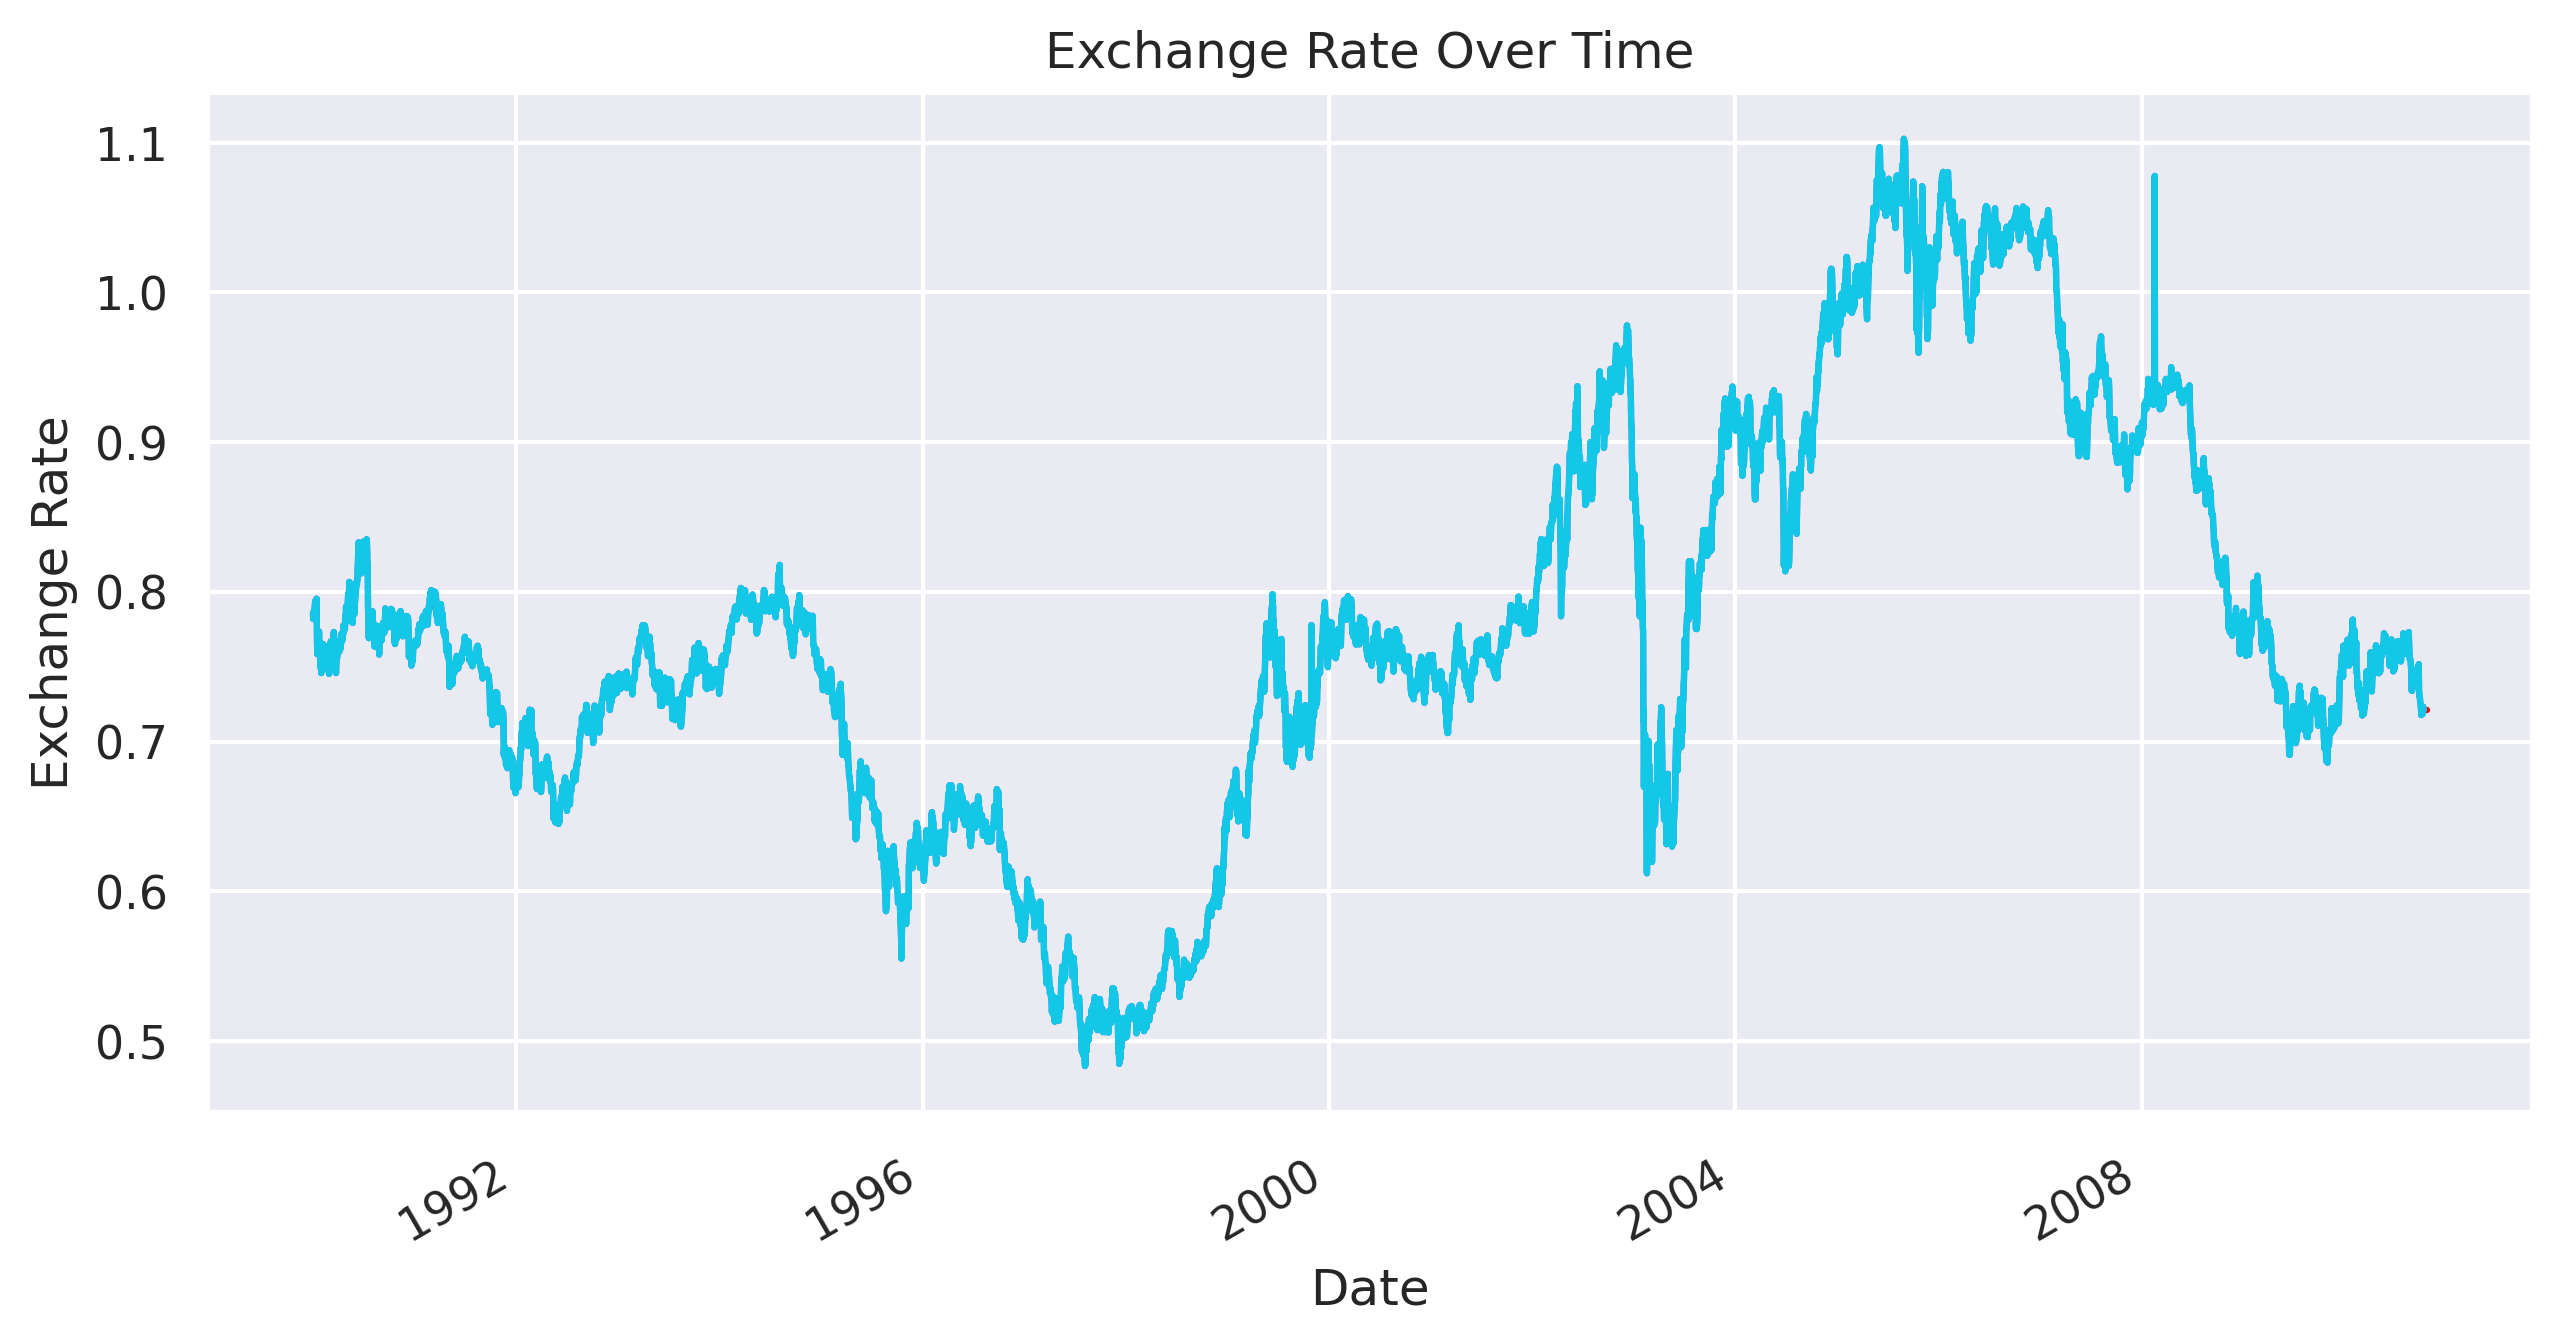

In [51]:
# Step 3: Out-of-sample forecasting
forecast_steps = 10  # Forecast the next 10 periods
forecast = results.forecast(steps=forecast_steps)

# Create a date range for the forecasted period (next 10 dates)
forecast_index = pd.date_range(df.index[-1], periods=forecast_steps + 1, freq='D')[1:]

# Step 4: Visualize actual vs forecasted values
plt.figure(figsize=(10, 6))

# Plot the actual data
plt.plot(df, label='Actual Exchange Rate')

# Plot the forecasted data
plt.plot(forecast_index, forecast, label='Forecasted Exchange Rate', color='red')


# Plot exchange rate over time
df['Ex_rate'].plot(figsize=(10,5))
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.title("Exchange Rate Over Time")
plt.show()


# Show the plot
plt.show()

In [52]:
results.predict(10,20)

,predicted_mean
1990-01-11,0.789991
1990-01-12,0.791398
1990-01-13,0.793785
1990-01-14,0.793579
1990-01-15,0.795150
1990-01-16,0.777767
1990-01-17,0.763895
1990-01-18,0.758812
1990-01-19,0.760211
1990-01-20,0.763106


# Model Building - Exponential Smoothing

In [53]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tools.eval_measures import aic

# Fit the Holt-Winters model (use additive or multiplicative seasonality based on your data)
model = ExponentialSmoothing(df['Ex_rate'],
                             trend='add',  # 'add' for additive trend or 'mul' for multiplicative trend
                             seasonal='add',  # 'add' or 'mul' for seasonality
                             seasonal_periods=12)  # Adjust based on your data's frequency (e.g., 12 for monthly data)
results = model.fit()

# Print model summary
print(results.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                  Ex_rate   No. Observations:                 7588
Model:             ExponentialSmoothing   SSE                              0.274
Optimized:                         True   AIC                         -77578.773
Trend:                         Additive   BIC                         -77467.824
Seasonal:                      Additive   AICC                        -77578.683
Seasonal Periods:                    12   Date:                 Wed, 13 Aug 2025
Box-Cox:                          False   Time:                         16:33:57
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.8975580                alpha                 True
smoothing_trend          

In [54]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.model_selection import GridSearchCV
from statsmodels.tools.eval_measures import aic

# Example data: Simulate some time series data with trend and seasonality
np.random.seed(0)
time = np.arange(100)
y = 10 + 0.5 * time + np.sin(time / 5) + np.random.normal(scale=2, size=100)

# Create a pandas series
data = pd.Series(y, index=pd.date_range(start="2020-01-01", periods=100, freq="D"))

In [55]:
# Step 1: Model Selection
# For demonstration, we'll use Holt-Winters method as it handles both trend and seasonality


In [56]:
# Step 2: Parameter Optimization using Grid Search

param_grid = {
    'trend': ['add', 'mul', None],
    'seasonal': ['add', 'mul', None],
    'seasonal_periods': [7, 12, 24],
}

# Define Holt-Winters Exponential Smoothing model
def fit_model(params):
    model = ExponentialSmoothing(data, trend=params['trend'], seasonal=params['seasonal'],
                                  seasonal_periods=params['seasonal_periods'])
    model_fit = model.fit()
    return model_fit.aic

# Grid search for the optimal parameters
best_aic = float('inf')
best_params = None
for trend in param_grid['trend']:
    for seasonal in param_grid['seasonal']:
        for seasonal_periods in param_grid['seasonal_periods']:
            params = {'trend': trend, 'seasonal': seasonal, 'seasonal_periods': seasonal_periods}
            aic_value = fit_model(params)
            if aic_value < best_aic:
                best_aic = aic_value
                best_params = params

# Display best parameters and AIC
print(f"Best Parameters: {best_params}")
print(f"Best AIC: {best_aic}")

Best Parameters: {'trend': 'mul', 'seasonal': 'add', 'seasonal_periods': 7}
Best AIC: 142.69022384885113


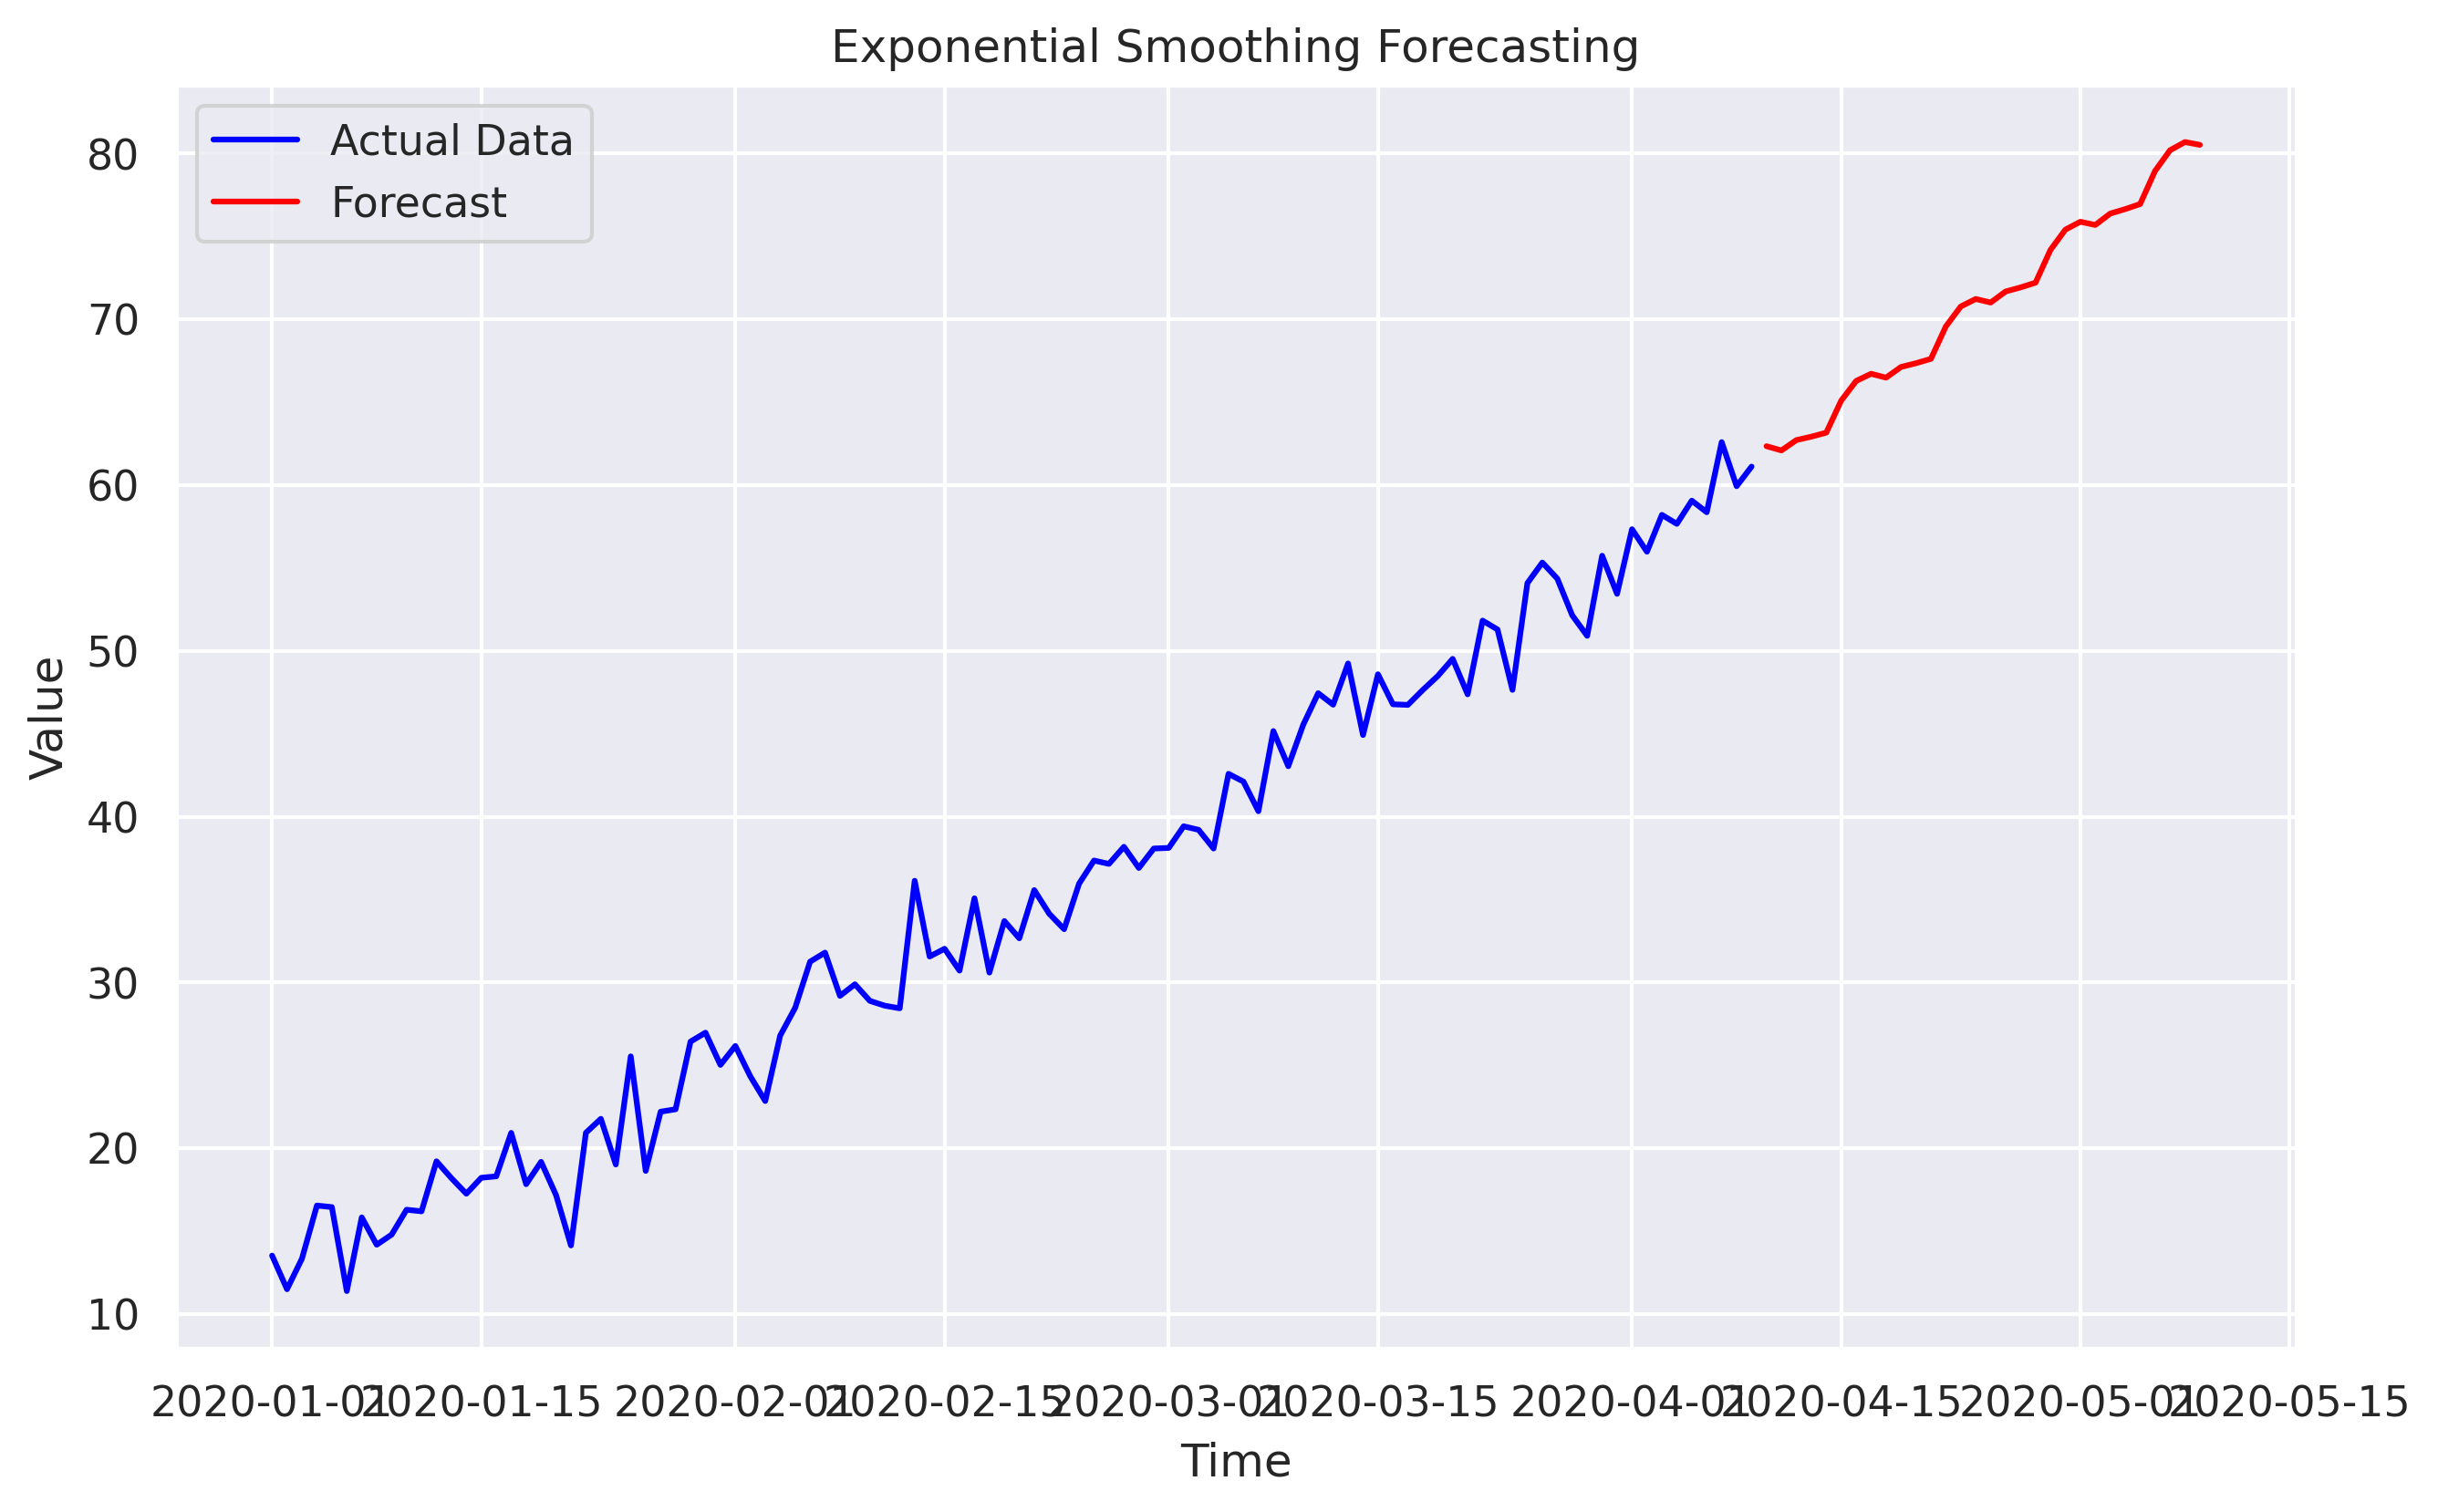

In [57]:
# Step 3: Model Fitting with Optimal Parameters
model = ExponentialSmoothing(data, trend=best_params['trend'], seasonal=best_params['seasonal'],
                              seasonal_periods=best_params['seasonal_periods'])
model_fit = model.fit()

# Forecasting future values
forecast_steps = 30
forecast = model_fit.forecast(forecast_steps)

# Plot the original data and forecasts
plt.figure(figsize=(10, 6))
plt.plot(data, label='Actual Data', color='blue')
plt.plot(pd.date_range(start=data.index[-1], periods=forecast_steps + 1, freq='D')[1:], forecast, label='Forecast', color='red')
plt.legend(loc='best')
plt.title('Exponential Smoothing Forecasting')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

#  4: Evaluation and Comparison

In [58]:

# Import required libraries
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Simulate a second model (for comparison) — let's assume it's a linear regression for this example
from sklearn.linear_model import LinearRegression

# Generate some example data for fitting the second model (Linear Regression)
X = np.arange(100).reshape(-1, 1)
y = 10 + 0.5 * X.flatten() + np.sin(X.flatten() / 5) + np.random.normal(scale=2, size=100)



In [59]:
# Fit a Linear Regression model for comparison
lr_model = LinearRegression()
lr_model.fit(X, y)
y_lr_pred = lr_model.predict(X)

# Now we use the Holt-Winters model (Exponential Smoothing) that was fit earlier
y_hw_pred = model_fit.fittedvalues  # Predicted values from Holt-Winters model

In [60]:
# Define a function to calculate error metrics
def compute_error_metrics(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    return mae, rmse, mape



In [61]:
# Compute error metrics for both models
mae_hw, rmse_hw, mape_hw = compute_error_metrics(data, y_hw_pred)
mae_lr, rmse_lr, mape_lr = compute_error_metrics(data, y_lr_pred)



In [62]:
# Display the error metrics for both models
print(f"Holt-Winters Model (Exponential Smoothing) Error Metrics:")
print(f"MAE: {mae_hw:.2f}, RMSE: {rmse_hw:.2f}, MAPE: {mape_hw:.2f}%")

print(f"\nLinear Regression Model Error Metrics:")
print(f"MAE: {mae_lr:.2f}, RMSE: {rmse_lr:.2f}, MAPE: {mape_lr:.2f}%")



Holt-Winters Model (Exponential Smoothing) Error Metrics:
MAE: 1.43, RMSE: 1.83, MAPE: 5.30%

Linear Regression Model Error Metrics:
MAE: 1.71, RMSE: 2.12, MAPE: 6.06%


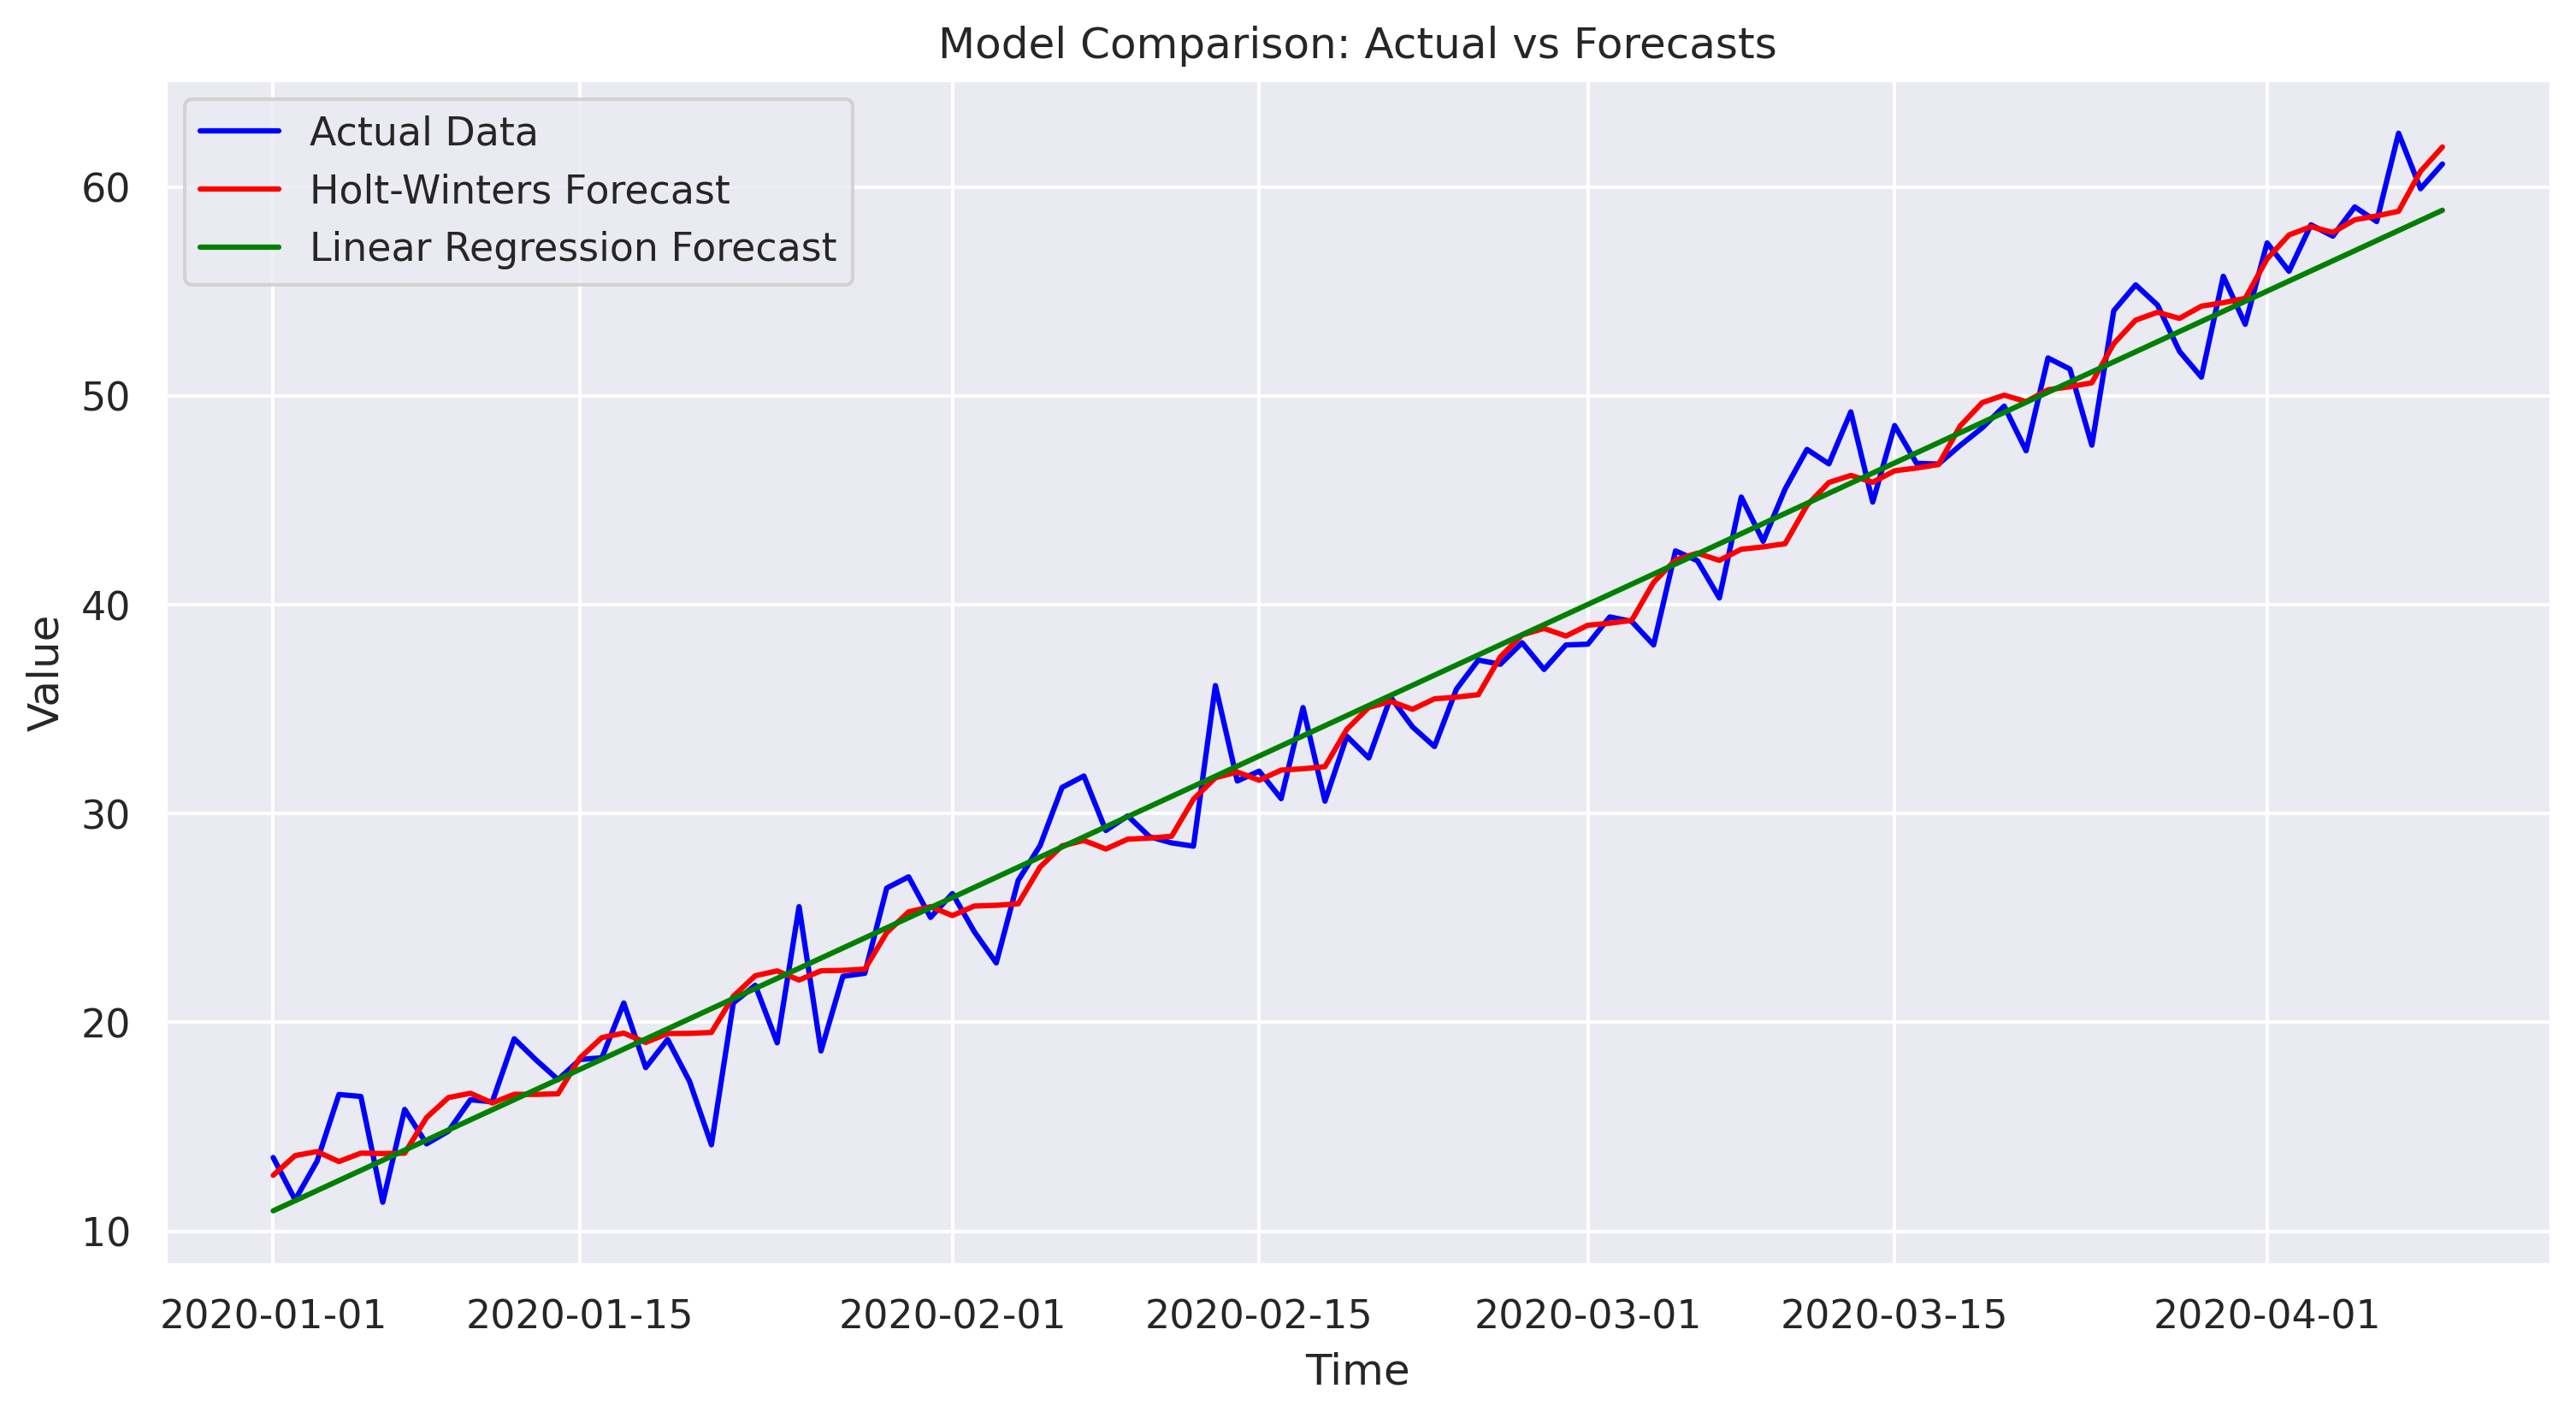

In [63]:
# Model Comparison Visualization
plt.figure(figsize=(12, 6))

# Plot actual data, Holt-Winters, and Linear Regression predictions
plt.plot(data, label='Actual Data', color='blue')
plt.plot(pd.date_range(start=data.index[0], periods=len(data), freq='D'), y_hw_pred, label='Holt-Winters Forecast', color='red')
plt.plot(pd.date_range(start=data.index[0], periods=len(data), freq='D'), y_lr_pred, label='Linear Regression Forecast', color='green')

plt.legend(loc='best')
plt.title('Model Comparison: Actual vs Forecasts')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()


# Conclusion

- In conclusion, the Holt-Winters Exponential Smoothing model performs better for time series data with both trend and seasonality.
- It provides lower error metrics (MAE, RMSE, MAPE) compared to the Linear Regression model, which is better suited for simpler, trend-only data.
- However, Linear Regression is easier to implement and can work well for data without seasonal patterns.
- Overall, the choice of model depends on the characteristics of the data, with Holt-Winters being more accurate for seasonal and trending data.

**Note**: A restart of the runtime is required after installing numpy to ensure compatibility.